# <span style='color:Red'> Projet Python S7 / Louis LIARD and Thomas RIVOAL  </span>

### Link for the dataset :

https://archive.ics.uci.edu/ml/datasets/Drug+consumption+%28quantified%29

## Problematic :
Drugs have many consequences on society and we will try to make prevention about the dangers of addictions regarding the people's caracteristics.

Problem which can be solved :
* Seven class classifications for each drug separately.
* Problem can be transformed to binary classification by union of part of classes into one new class. For example, "Never Used", "Used over a Decade Ago" form class "Non-user" and all other classes form class "User".
* The best binarization of classes for each attribute.
* Evaluation of risk to be drug consumer for each drug.

## I - Import, Understand and Clean the Data

In [517]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score
import scipy.cluster.hierarchy as sch
%matplotlib inline

### Lecture of datas :

In [518]:
datas=pd.read_csv("datadrug.txt",header=None,sep=",")

In [519]:
datas.columns=["ID","Age","Gender","Education","Country","Ethnicity","Neuroticism","Extraversion","Openness","Agreeableness","Conscientiousness","Impulsiveness","Sensation","Alcohol","Amphet","Amyl","Benzos","Caffeine","Cannabis","Chocolate","Coke","Crack","Ecstasy","Heroin","Ketamine","Legal_highs","LSD","Meth","Mushrooms","Nicotine","Semer","VSA"]

In [520]:
datas.head(10)

,ID,Age,Gender,Education,Country,Ethnicity,Neuroticism,Extraversion,Openness,Agreeableness,...,Ecstasy,Heroin,Ketamine,Legal_highs,LSD,Meth,Mushrooms,Nicotine,Semer,VSA
0,1,0.49788,0.48246,-0.05921,0.96082,0.12600,0.31287,-0.57545,-0.58331,-0.91699,...,CL0,CL0,CL0,CL0,CL0,CL0,CL0,CL2,CL0,CL0
1,2,-0.07854,-0.48246,1.98437,0.96082,-0.31685,-0.67825,1.93886,1.43533,0.76096,...,CL4,CL0,CL2,CL0,CL2,CL3,CL0,CL4,CL0,CL0
2,3,0.49788,-0.48246,-0.05921,0.96082,-0.31685,-0.46725,0.80523,-0.84732,-1.62090,...,CL0,CL0,CL0,CL0,CL0,CL0,CL1,CL0,CL0,CL0
3,4,-0.95197,0.48246,1.16365,0.96082,-0.31685,-0.14882,-0.80615,-0.01928,0.59042,...,CL0,CL0,CL2,CL0,CL0,CL0,CL0,CL2,CL0,CL0
4,5,0.49788,0.48246,1.98437,0.96082,-0.31685,0.73545,-1.63340,-0.45174,-0.30172,...,CL1,CL0,CL0,CL1,CL0,CL0,CL2,CL2,CL0,CL0
5,6,2.59171,0.48246,-1.22751,0.24923,-0.31685,-0.67825,-0.30033,-1.55521,2.03972,...,CL0,CL0,CL0,CL0,CL0,CL0,CL0,CL6,CL0,CL0
6,7,1.09449,-0.48246,1.16365,-0.57009,-0.31685,-0.46725,-1.09207,-0.45174,-0.30172,...,CL0,CL0,CL0,CL0,CL0,CL0,CL0,CL6,CL0,CL0
7,8,0.49788,-0.48246,-1.73790,0.96082,-0.31685,-1.32828,1.93886,-0.84732,-0.30172,...,CL0,CL0,CL0,CL0,CL0,CL0,CL0,CL0,CL0,CL0
8,9,0.49788,0.48246,-0.05921,0.24923,-0.31685,0.62967,2.57309,-0.97631,0.76096,...,CL0,CL0,CL0,CL0,CL0,CL0,CL0,CL6,CL0,CL0
9,10,1.82213,-0.48246,1.16365,0.96082,-0.31685,-0.24649,0.00332,-1.42424,0.59042,...,CL0,CL0,CL0,CL0,CL0,CL0,CL0,CL6,CL0,CL0


In [521]:
# Set data index, it is better to use the ID.

datas.set_index('ID', inplace = True)

In [522]:
# First we must check if there are NaN's values in this dataset

print(datas.isna().sum())

Age                  0
Gender               0
Education            0
Country              0
Ethnicity            0
Neuroticism          0
Extraversion         0
Openness             0
Agreeableness        0
Conscientiousness    0
Impulsiveness        0
Sensation            0
Alcohol              0
Amphet               0
Amyl                 0
Benzos               0
Caffeine             0
Cannabis             0
Chocolate            0
Coke                 0
Crack                0
Ecstasy              0
Heroin               0
Ketamine             0
Legal_highs          0
LSD                  0
Meth                 0
Mushrooms            0
Nicotine             0
Semer                0
VSA                  0
dtype: int64


#### We can see that there are no NaN's values so we can work with this dataset.

In [523]:
# Now let see an overview about datas

datas.describe()

,Age,Gender,Education,Country,Ethnicity,Neuroticism,Extraversion,Openness,Agreeableness,Conscientiousness,Impulsiveness,Sensation
count,1885.00000,1885.000000,1885.000000,1885.000000,1885.000000,1885.000000,1885.000000,1885.000000,1885.000000,1885.000000,1885.000000,1885.000000
mean,0.03461,-0.000256,-0.003806,0.355542,-0.309577,0.000047,-0.000163,-0.000534,-0.000245,-0.000386,0.007216,-0.003292
std,0.87836,0.482588,0.950078,0.700335,0.166226,0.998106,0.997448,0.996229,0.997440,0.997523,0.954435,0.963701
min,-0.95197,-0.482460,-2.435910,-0.570090,-1.107020,-3.464360,-3.273930,-3.273930,-3.464360,-3.464360,-2.555240,-2.078480
25%,-0.95197,-0.482460,-0.611130,-0.570090,-0.316850,-0.678250,-0.695090,-0.717270,-0.606330,-0.652530,-0.711260,-0.525930
50%,-0.07854,-0.482460,-0.059210,0.960820,-0.316850,0.042570,0.003320,-0.019280,-0.017290,-0.006650,-0.217120,0.079870
75%,0.49788,0.482460,0.454680,0.960820,-0.316850,0.629670,0.637790,0.723300,0.760960,0.584890,0.529750,0.765400
max,2.59171,0.482460,1.984370,0.960820,1.907250,3.273930,3.273930,2.901610,3.464360,3.464360,2.901610,1.921730


## <span style='color:Red'> Binary classification :  </span>
####  We know that each of independent label variables contains seven classes: "Never Used", "Used over a Decade Ago", "Used in Last Decade", "Used in Last Year", "Used in Last Month", "Used in Last Week", and "Used in Last Day".

Thus, one of the most important questions concerning the study of our data is how to separate the different types of drug users. The aim here is to define at what point a person is considered a "user" or a "non-user", so the problem is related to a binary classification. Everyone can have their own opinion when describing someone as a drug user but a choice had to be made. We had to take in consideration the stability of this classification and the logic behind it. It is obvious that someone who has taken drugs 10 years ago can't be considered as a drug user because it would unbalance the data.

After much consideration, we decided to define a "user" as someone who has used a drug in the last month. 

Therefore, persons with drug consumption as "Used in Last Month", "Used in Last Week", and "Used in Last Day" are define as "User". 

"Non-Users" are persons with drug consumption as "Never Used", "Used over a Decade Ago", "Used in Last Decade" and "Used in Last Year".

We replace target variables with 0 and 1 for the binary classification :

* 1 : if a person used a drug in the last month, week or day, then he is considered as "User".

* 0 : for a consumption preceding the last month the person is considered as "Non-User"


In [524]:
def splitbinary(target):
    
    if ((target == 'CL6') or (target == 'CL5') or (target == 'CL4') ):
        target = 1
    
    elif ((target == 'CL0') or (target == 'CL1') or (target == 'CL2') or (target == 'CL3') ):
        target = 0
    
    return target

In [525]:
# Now, we apply binary targets

datas['Amphet'] = datas['Amphet'].map(splitbinary)

datas['Amyl'] = datas['Amyl'].map(splitbinary)

datas['Benzos'] = datas['Benzos'].map(splitbinary)

datas['Cannabis'] = datas['Cannabis'].map(splitbinary)

datas['Coke'] = datas['Coke'].map(splitbinary)

datas['Crack'] = datas['Crack'].map(splitbinary)

datas['Ecstasy'] = datas['Ecstasy'].map(splitbinary)

datas['Heroin'] = datas['Heroin'].map(splitbinary)

datas['Ketamine'] = datas['Ketamine'].map(splitbinary)

datas['LSD'] = datas['LSD'].map(splitbinary)

datas['Meth'] = datas['Meth'].map(splitbinary)

datas['Mushrooms'] = datas['Mushrooms'].map(splitbinary)

datas['Semer'] = datas['Semer'].map(splitbinary)

datas['VSA'] = datas['VSA'].map(splitbinary)

datas['Alcohol'] = datas['Alcohol'].map(splitbinary)

datas['Legal_highs'] = datas['Legal_highs'].map(splitbinary)

datas['Nicotine'] = datas['Nicotine'].map(splitbinary)

datas['Chocolate'] = datas['Chocolate'].map(splitbinary)

datas['Caffeine'] = datas['Caffeine'].map(splitbinary)

In [526]:
datas.head()

,Age,Gender,Education,Country,Ethnicity,Neuroticism,Extraversion,Openness,Agreeableness,Conscientiousness,...,Ecstasy,Heroin,Ketamine,Legal_highs,LSD,Meth,Mushrooms,Nicotine,Semer,VSA
ID,,,,,,,,,,,,,,,,,,,,,
1,0.49788,0.48246,-0.05921,0.96082,0.12600,0.31287,-0.57545,-0.58331,-0.91699,-0.00665,...,0,0,0,0,0,0,0,0,0,0
2,-0.07854,-0.48246,1.98437,0.96082,-0.31685,-0.67825,1.93886,1.43533,0.76096,-0.14277,...,1,0,0,0,0,0,0,1,0,0
3,0.49788,-0.48246,-0.05921,0.96082,-0.31685,-0.46725,0.80523,-0.84732,-1.62090,-1.01450,...,0,0,0,0,0,0,0,0,0,0
4,-0.95197,0.48246,1.16365,0.96082,-0.31685,-0.14882,-0.80615,-0.01928,0.59042,0.58489,...,0,0,0,0,0,0,0,0,0,0
5,0.49788,0.48246,1.98437,0.96082,-0.31685,0.73545,-1.63340,-0.45174,-0.30172,1.30612,...,0,0,0,0,0,0,0,0,0,0


Here we convert float values in .5f values to read them correctly.
Indeed, the number 0.48246 can be 0.4824600001 that's why the comparison does not work.

In [527]:
def floatnumber(x):
    x = float('{:.5f}'.format(x))
    return x

for i in list(datas.columns):
    datas[i] = datas[i].map(floatnumber)

### Now, we change the features values so that the dataset can be more understandable. Therefore, there is no more float values, we have only int values.

## <span style='color:Blue'> Here is a summary of new values for the dataset :  </span>
### Age :
* '18-24' -> 0
* '25-34' -> 1
* '35-44' -> 2
* '45-54' -> 3
* '55-64' -> 4
* '65+'   -> 5

### Gender :
* Female -> 0
* Male   -> 1

### Education :
* Left school before 16 years                          -> 0
* Left school at 16 years                              -> 1
* Left school at 17 years                              -> 2
* Left school at 18 years                              -> 3
* Some college or university, no certificate or degree -> 4
* Professional certificate/ diploma                    -> 5
* University degree                                    -> 6
* Masters degree                                       -> 7
* Doctorate degree                                     -> 8

### Country :
* Australia            -> 0
* Canada               -> 1
* New Zealand          -> 2
* Other                -> 3
* Republic of Ireland  -> 4
* UK                   -> 5
* USA                  -> 6

### Ethnicity :
* Asian             -> 0
* Black             -> 1
* Mixed-Black/Asian -> 2
* Mixed-White/Asian -> 3
* Mixed-White/Black -> 4
* Other             -> 5
* White             -> 6

### Neuroticism
is a long-term tendency to experience negative emotions suchas nervousness, tension, anxiety and depression <br>
Min : -3.46436    Max : 3.27393 

### Extraversion 
is manifested in outgoing, warm, active, assertive, talkative, cheerful, and in search of stimulation characteristics <br>
Min : -3.27393    Max : 3.27393

### Openness 
is a general appreciation for art, unusual ideas, and imaginative, creative, unconventional, and wide interests <br>
Min : -3.27393    Max : 2.90161

### Agreeableness 
is a dimension of interpersonal relations, characterized by altruism, trust, modesty, kindness, compassion and cooperativeness <br>
Min : -3.46436    Max : 3.46436

### Conscientiousness 
is a tendency to be organized and dependable,
strong-willed, persistent, reliable, and efficient <br>
Min : -3.46436    Max : 3.46436

**--> The five factors N, E, O, A and C are part of the NEO-FFI-R which is a highly reliable measure of basic personality domains**

### Impulsiveness
measured by BIS-11, comprises three subscales. <br>
The ‘motor’ aspect reflects acting without thinking, the ‘attentional’ component poor concentration and thought intrusions, and the ‘non-planning’ a lack of consideration for consequences <br>
Min : -2.55524    Max : 2.90161

### Sensation 
is regarded as a measure of a general sensation-seeking trait <br>
Min : -2.07848    Max : -0.00329

In [528]:
def changeAge(x):
    if (x == -0.95197):
        x = 0
    elif (x == -0.07854):
        x = 1
    elif (x == 0.49788):
        x = 2
    elif (x == 1.09449):
        x = 3
    elif (x == 1.82213):
        x = 4
    elif (x == 2.59171):
        x = 5
    return x

def changeGender(x):
    if (x == 0.48246 ):
        x = 0
    elif (x == -0.48246 ):
        x = 1
    return x

def changeEducation(x):
  if (x == -2.43591):
    x = 0
  elif (x == -1.73790):
    x = 1
  elif (x == -1.43719):
    x = 2
  elif (x == -1.22751):
    x = 3
  elif (x == -0.61113):
    x = 4
  elif (x == -0.05921):
    x = 5
  elif (x == 0.45468):
    x = 6
  elif (x == 1.16365):
    x = 7
  elif (x == 1.98437):
    x = 8
  return x

def changeCountry(x):
  if (x == -0.09765):
    x = 0
  elif (x == 0.24923):
    x = 1
  elif (x == -0.46841):
    x = 2
  elif (x == -0.28519):
    x = 3
  elif (x == 0.21128):
    x = 4
  elif (x == 0.96082):
    x = 5
  elif (x == -0.57009):
    x = 6
  return x

def changeEthnicity(x):
  if (x == -0.50212):
    x = 0
  elif (x == -1.10702):
    x = 1
  elif (x == 1.90725):
    x = 2
  elif (x == 0.12600):
    x = 3
  elif (x == -0.22166):
    x = 4
  elif (x == 0.11440):
    x = 5
  elif (x == -0.31685):
    x = 6
  return x

datas['Age'] = datas['Age'].map(changeAge)
datas['Gender'] = datas['Gender'].map(changeGender)
datas['Education'] = datas['Education'].map(changeEducation)
datas['Country'] = datas['Country'].map(changeCountry)
datas['Ethnicity'] = datas['Ethnicity'].map(changeEthnicity)

In [529]:
datas.head(15)

,Age,Gender,Education,Country,Ethnicity,Neuroticism,Extraversion,Openness,Agreeableness,Conscientiousness,...,Ecstasy,Heroin,Ketamine,Legal_highs,LSD,Meth,Mushrooms,Nicotine,Semer,VSA
ID,,,,,,,,,,,,,,,,,,,,,
1,2,0,5,5,3,0.31287,-0.57545,-0.58331,-0.91699,-0.00665,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1,1,8,5,6,-0.67825,1.93886,1.43533,0.76096,-0.14277,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,2,1,5,5,6,-0.46725,0.80523,-0.84732,-1.62090,-1.01450,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0,0,7,5,6,-0.14882,-0.80615,-0.01928,0.59042,0.58489,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,2,0,8,5,6,0.73545,-1.63340,-0.45174,-0.30172,1.30612,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6,5,0,3,1,6,-0.67825,-0.30033,-1.55521,2.03972,1.63088,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
7,3,1,7,6,6,-0.46725,-1.09207,-0.45174,-0.30172,0.93949,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
8,2,1,1,5,6,-1.32828,1.93886,-0.84732,-0.30172,1.63088,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9,2,0,5,1,6,0.62967,2.57309,-0.97631,0.76096,1.13407,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


# Explanation of the Drugs Separation

The data set included information on the consumption of 18 central nervous system psychoactive drugs: alcohol, amphetamines, amyl nitrite, benzodiazepines, cannabis, chocolate, cocaine, caffeine, crack, ecstasy, heroin, ketamine, legal highs, LSD, methadone, mushrooms, nicotine, and VSA (output attributes).

We decided to create different categories of drugs based on the correlation pleiades presented in the first article of the website. The article explains that there are three groups of drugs with strongly correlated consumption. That is, the drug usage has a ‘modular structure’. The idea to merge correlated attributes into ‘modules’ is popular in biology. The modules are called the "correlation pleiades". We have been strongly inspired by this model with some modifications. We added the "amyl" in the ecstasy pleiad and the "benzos" in the benzodiazepines pleiad. Indeed, we chose this classifiction thanks to our clustered correlation matrix (below). Finally we created another pleiad the accessible drugs pleiad which includes all the drugs of our database that legal or easily accessible (like cannabis even if it depends on the country/state). We have 4 different pleiads

- Heroin pleiad : crack, cocaine, methadone, and heroin

- Ecstasy pleiad : amphetamines, cannabis, cocaine, ketamine, LSD, magic mushrooms, legal highs, ecstasy and amyl

- Benzodiazepines pleiad : methadone, amphetamines, benzodizepine and cocaine

- Accessible drugs pleiad : alcohol and nicotine

The remaining drugs do not allow for a meaningful analysis of the data. Sowing, for example, is a fake drug. There is therefore no point in analyzing it.

## Clustered Correlation Matrix

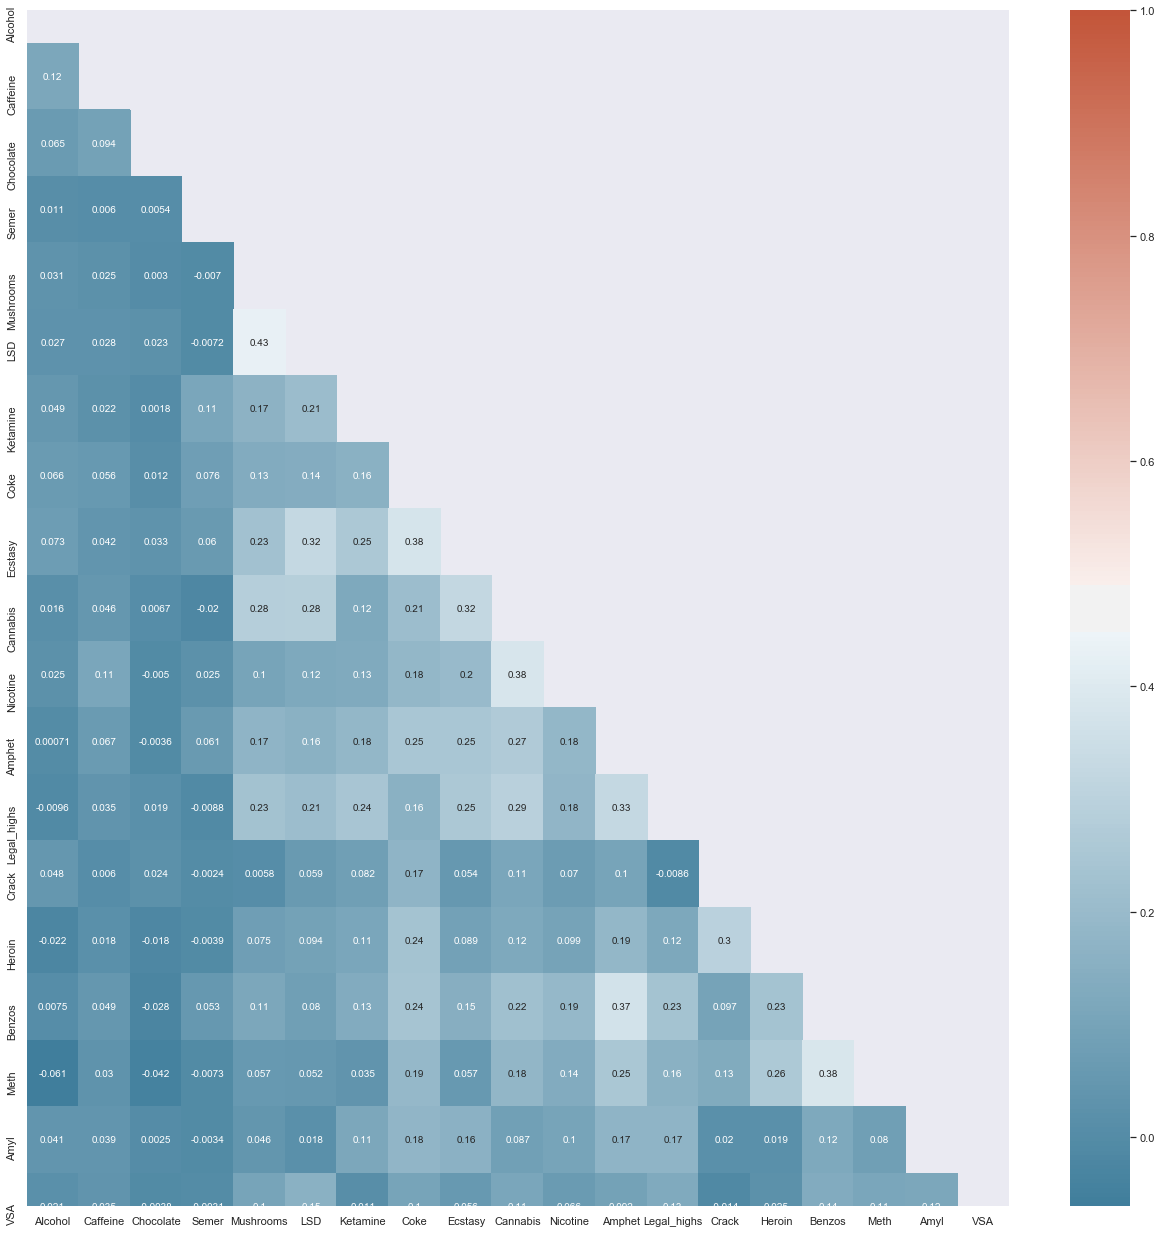

In [530]:
# Creation of a dataframe containing only the drugs
drugs_datas=datas[["Alcohol","Amphet","Amyl","Benzos","Caffeine","Cannabis","Chocolate","Coke","Crack","Ecstasy","Heroin","Ketamine","Legal_highs","LSD","Meth","Mushrooms","Nicotine","Semer","VSA"]]


def cluster_corr(corr_array, inplace=False):
    
    pairwise_distances = sch.distance.pdist(corr_array)
    linkage = sch.linkage(pairwise_distances, method='complete')
    cluster_distance_threshold = pairwise_distances.max()/2
    idx_to_cluster_array = sch.fcluster(linkage, cluster_distance_threshold, 
                                        criterion='distance')
    idx = np.argsort(idx_to_cluster_array)
    
    if not inplace:
        corr_array = corr_array.copy()
    
    if isinstance(corr_array, pd.DataFrame):
        return corr_array.iloc[idx, :].T.iloc[idx, :]
    return corr_array[idx, :][:, idx]

# Correlation between different variables
corr = drugs_datas.corr()

# Set up the matplotlib plot configuration
f, ax = plt.subplots(figsize=(22,22))

# Generate a mask for upper traingle
mask = np.triu(np.ones_like(corr, dtype=bool))

# Configure a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Draw the heatmap
sns.heatmap(cluster_corr(drugs_datas.corr()), annot=True, mask = mask, cmap=cmap)

## Distribution of users/non-users by drug

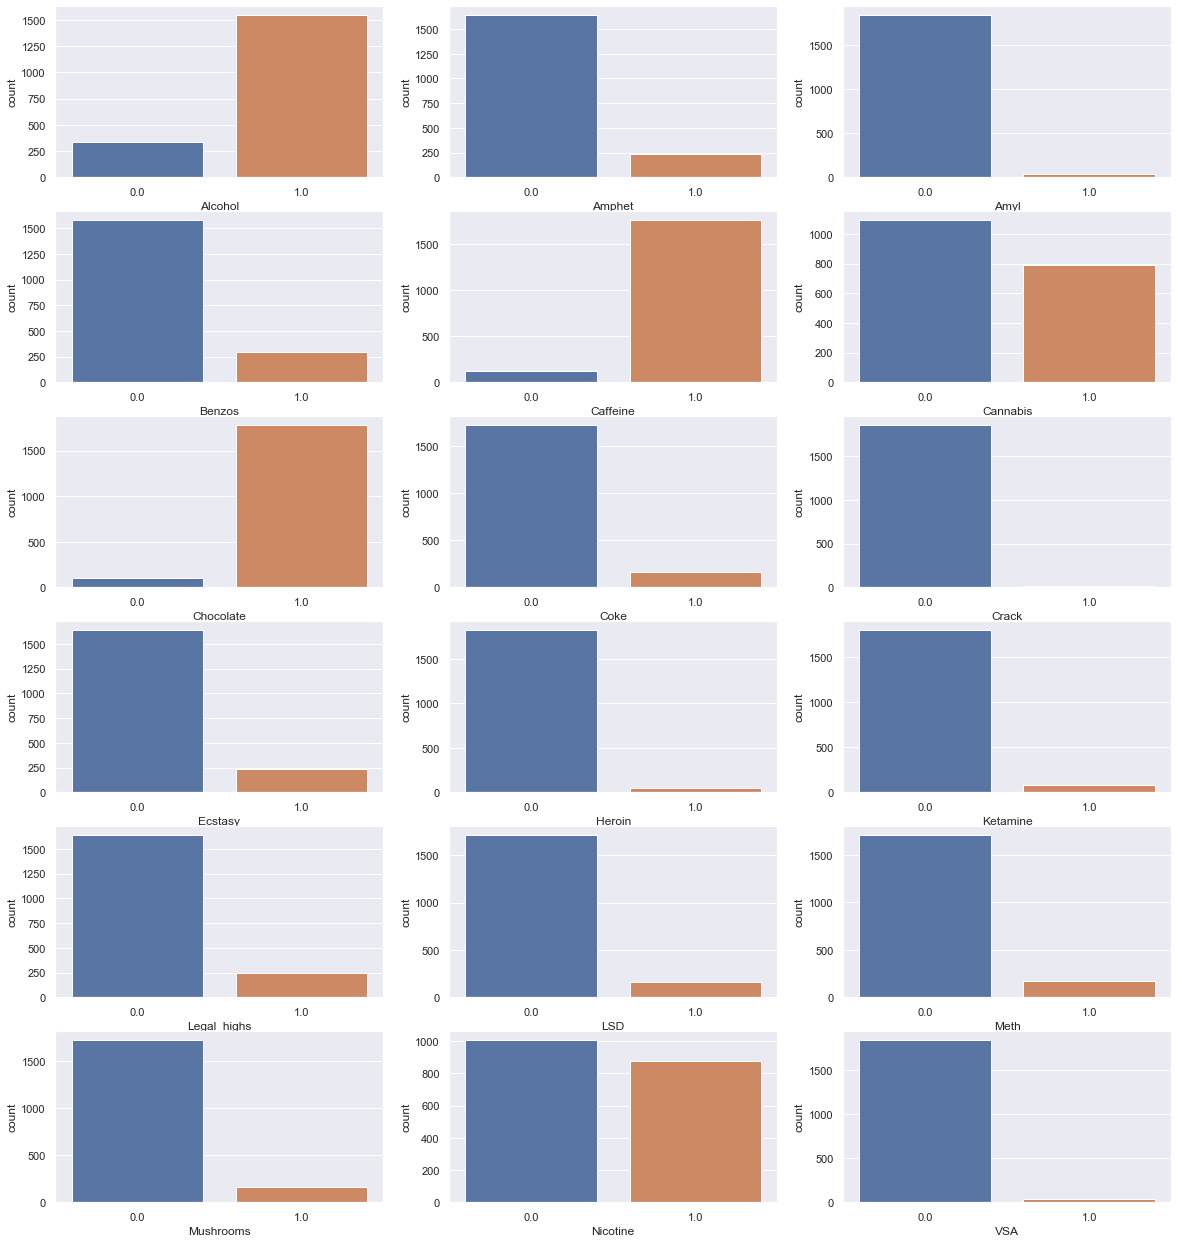

In [531]:
fig,axs=plt.subplots(nrows=6, ncols=3, figsize=(20,22))
c=0
r=0
for i in ["Alcohol","Amphet","Amyl","Benzos","Caffeine","Cannabis","Chocolate","Coke","Crack","Ecstasy","Heroin","Ketamine","Legal_highs","LSD","Meth","Mushrooms","Nicotine","VSA"]:
    sns.countplot(x=i,data=datas, ax=axs[r,c])
    if c<3:
        c+=1
    if c==3:
        c=0
        r+=1

In [532]:
datas['heroinGroup'] = datas.apply(lambda x: int((x['Coke'] + x['Crack'] + x['Heroin'] + x['Meth'])>0), axis = 1)
datas['ecstasyGroup'] = datas.apply(lambda x: int((x['Amphet']  + x['Cannabis'] + x['Coke'] + x['Ketamine'] + x['Ecstasy']  + x['LSD'] + x['Legal_highs'] + x['Mushrooms'] + x['Amyl'] )>0), axis = 1)
datas['benzoGroup'] = datas.apply(lambda x: int((x['Amphet'] + x['Coke'] + x['Meth'] + x['Benzos'])>0), axis = 1)
datas['accessGroup'] = datas.apply(lambda x: int((x['Alcohol'] + x['Nicotine'])>0), axis = 1)
datas.drop(['Caffeine','Chocolate','Nicotine','Legal_highs','Alcohol','Amphet','Amyl','Benzos', 'Cannabis', 'Coke', 'Crack', 'Ecstasy', 'Heroin', 'Ketamine', 'LSD', 'Meth', 'Mushrooms', 'Semer', 'VSA'], axis = 1, inplace = True)
datas.head()

,Age,Gender,Education,Country,Ethnicity,Neuroticism,Extraversion,Openness,Agreeableness,Conscientiousness,Impulsiveness,Sensation,heroinGroup,ecstasyGroup,benzoGroup,accessGroup
ID,,,,,,,,,,,,,,,,
1,2,0,5,5,3,0.31287,-0.57545,-0.58331,-0.91699,-0.00665,-0.21712,-1.18084,0,0,0,1
2,1,1,8,5,6,-0.67825,1.93886,1.43533,0.76096,-0.14277,-0.71126,-0.21575,0,1,0,1
3,2,1,5,5,6,-0.46725,0.80523,-0.84732,-1.62090,-1.01450,-1.37983,0.40148,0,0,0,1
4,0,0,7,5,6,-0.14882,-0.80615,-0.01928,0.59042,0.58489,-1.37983,-1.18084,0,0,0,1
5,2,0,8,5,6,0.73545,-1.63340,-0.45174,-0.30172,1.30612,-0.21712,-0.21575,0,0,0,1


## Distribution of users/non-users by group

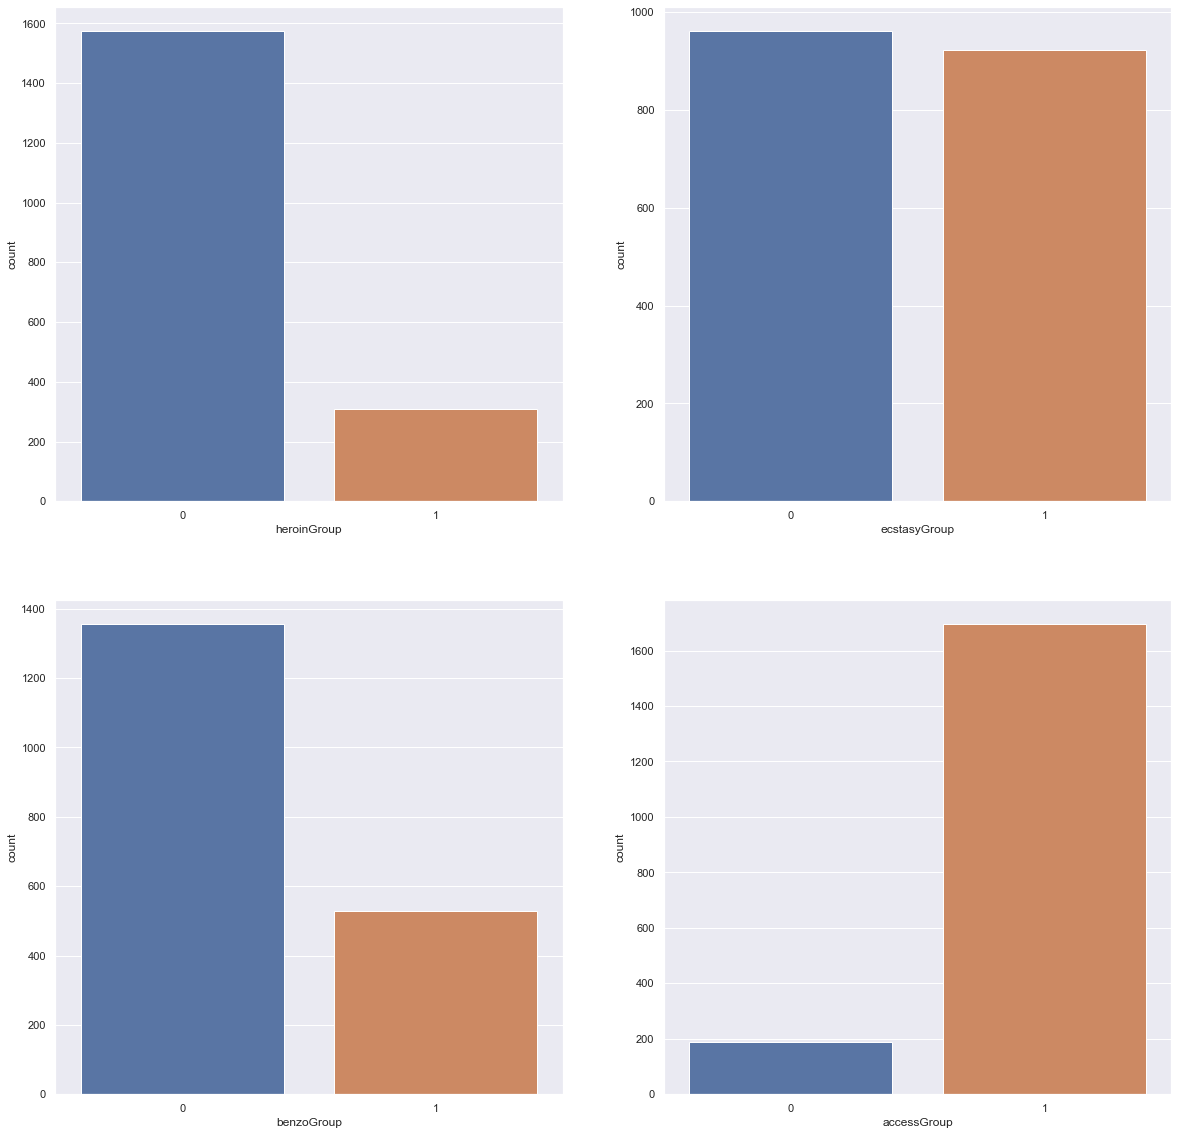

In [533]:
fig,axs=plt.subplots(nrows=2, ncols=2, figsize=(20,20))
c=0
r=0
for i in ['heroinGroup','ecstasyGroup','benzoGroup','accessGroup']:
    sns.countplot(x=i,data=datas, ax=axs[r,c])
    if c<2:
        c+=1
    if c==2:
        c=0
        r+=1

## Removal of 2 attributes : Country and Ethnicity

As we can see on the following charts these attributes are really unbalanced and therefore won't give us useful information. <br>

Here we see that the vast majority of people are white.

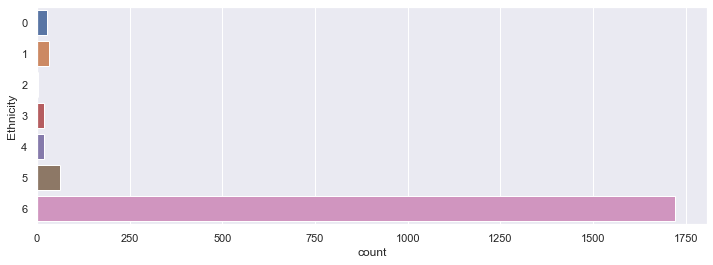

In [534]:
f, ax = plt.subplots(figsize=(12, 4))
sns.countplot(y="Ethnicity", data=datas)

Almost all people are from the UK or the USA, so this aspect.

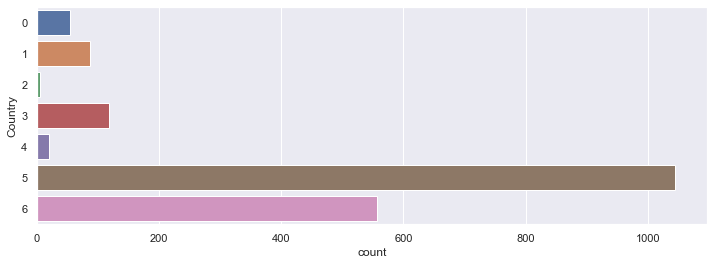

In [535]:
f, ax = plt.subplots(figsize=(12, 4))
sns.countplot(y="Country", data=datas)

In [536]:
# Cretion of new dtaframes with only one drug group each
datasH = datas.drop(['ecstasyGroup', 'benzoGroup','accessGroup'], axis=1)
datasE= datas.drop(['heroinGroup', 'benzoGroup','accessGroup'], axis=1)
datasB= datas.drop(['heroinGroup', 'ecstasyGroup','accessGroup'], axis=1)
datasA = datas.drop(['ecstasyGroup', 'benzoGroup','heroinGroup'], axis=1)

# correlation tables

corr_on_heroinGroup = datasH.corrwith(datasH.heroinGroup)
corr_on_heroinGroup_dict = corr_on_heroinGroup.to_dict()

corr_on_ecstasyGroup = datasE.corrwith(datasE.ecstasyGroup)
corr_on_ecstasyGroup_dict = corr_on_ecstasyGroup.to_dict()

corr_on_benzoGroup = datasB.corrwith(datasB.benzoGroup)
corr_on_benzoGroup_dict = corr_on_benzoGroup.to_dict()

corr_on_accessGroup = datasA.corrwith(datasA.accessGroup)
corr_on_accessGroup_dict = corr_on_accessGroup.to_dict()

#removing the key of target
def removekey(d, key):
    r = dict(d)
    del r[key]
    return r
  
corr_on_heroinGroup_dict = removekey(corr_on_heroinGroup_dict, 'heroinGroup')
corr_on_ecstasyGroup_dict = removekey(corr_on_ecstasyGroup_dict, 'ecstasyGroup')
corr_on_benzoGroup_dict = removekey(corr_on_benzoGroup_dict, 'benzoGroup')
corr_on_accessGroup_dict = removekey(corr_on_accessGroup_dict, 'accessGroup')

#Sorting correlation dictionaries

import operator
sorted_dict1 = sorted(corr_on_heroinGroup_dict.items(), key=operator.itemgetter(1))
sorted_dict2 = sorted(corr_on_ecstasyGroup_dict.items(), key=operator.itemgetter(1))
sorted_dict3 = sorted(corr_on_benzoGroup_dict.items(), key=operator.itemgetter(1))
sorted_dict4 = sorted(corr_on_accessGroup_dict.items(), key=operator.itemgetter(1))

## Plot correlation on heroinGroup
We show here the HeroinGroup chart because they roughly have the same data concerning country and ethnicity

Text(0.5, 1.0, 'Correlation value on heroinGroup ')

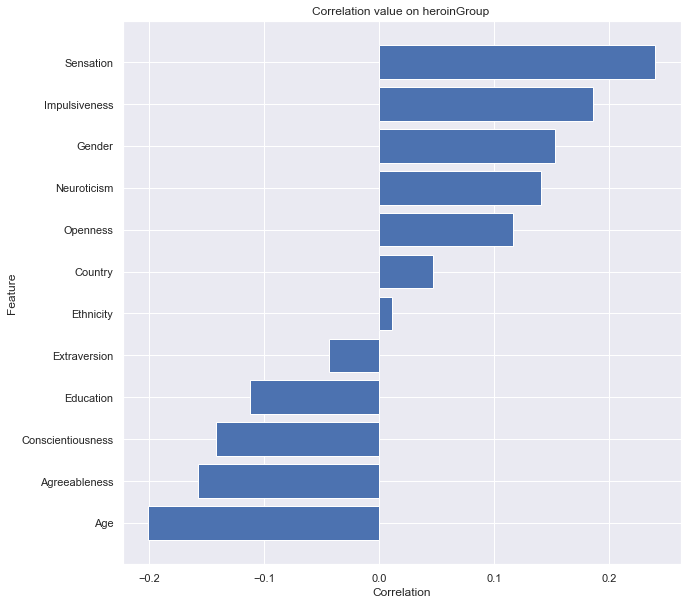

In [537]:
plt.figure(figsize=(10,10)) 
plt.barh(list(map(lambda x: x[0],sorted_dict1)), list(map(lambda x: x[1],sorted_dict1))) 
plt.xlabel('Correlation') 
plt.ylabel('Feature') 
plt.title('Correlation value on heroinGroup ')

Text(0.5, 1.0, 'Correlation value on accessGroup ')

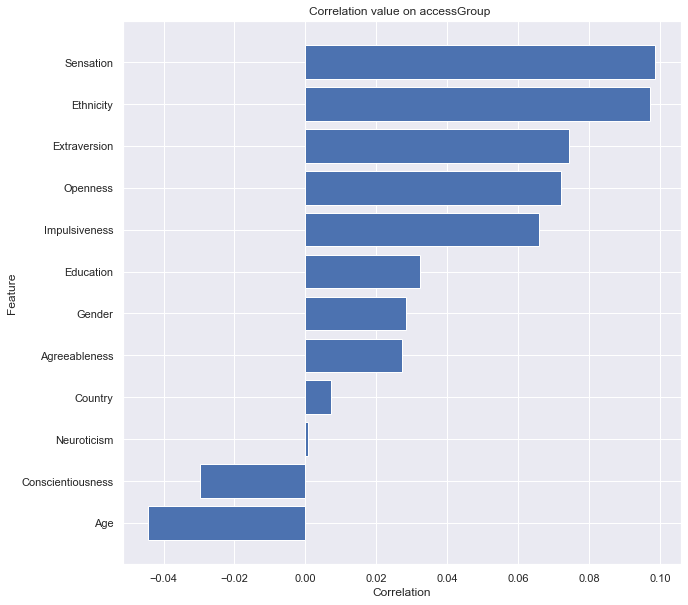

In [538]:
#Plot correlation on accessGroup
plt.figure(figsize=(10,10)) 
plt.barh(list(map(lambda x: x[0],sorted_dict4)), list(map(lambda x: x[1],sorted_dict4))) 
plt.xlabel('Correlation') 
plt.ylabel('Feature') 
plt.title('Correlation value on accessGroup ')

# Visualizations

## Number of users by age

In [367]:
sns.set(rc = {'figure.figsize':(10,6)})

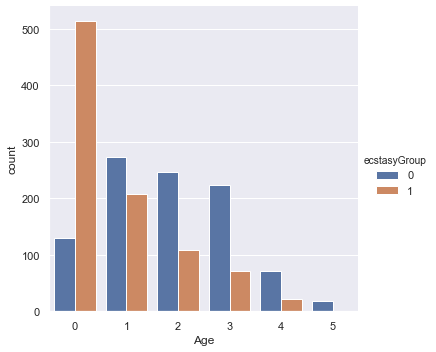

In [539]:
sns.catplot(x="Age", hue="ecstasyGroup", kind="count", data=datasE)

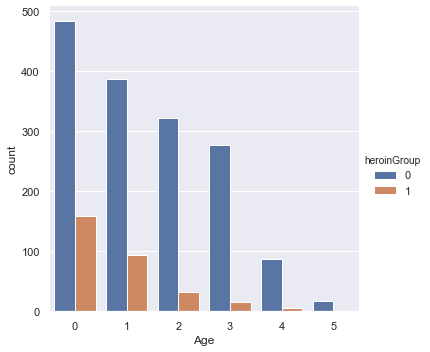

In [540]:
sns.catplot(x="Age", hue="heroinGroup", kind="count", data=datasH)

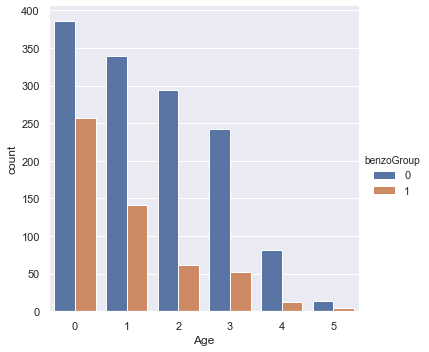

In [541]:
sns.catplot(x="Age", hue="benzoGroup", kind="count", data=datasB)

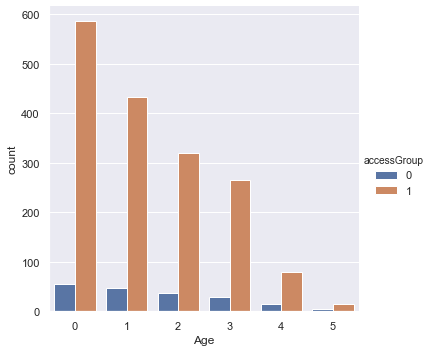

In [542]:
sns.catplot(x="Age", hue="accessGroup", kind="count", data=datasA)

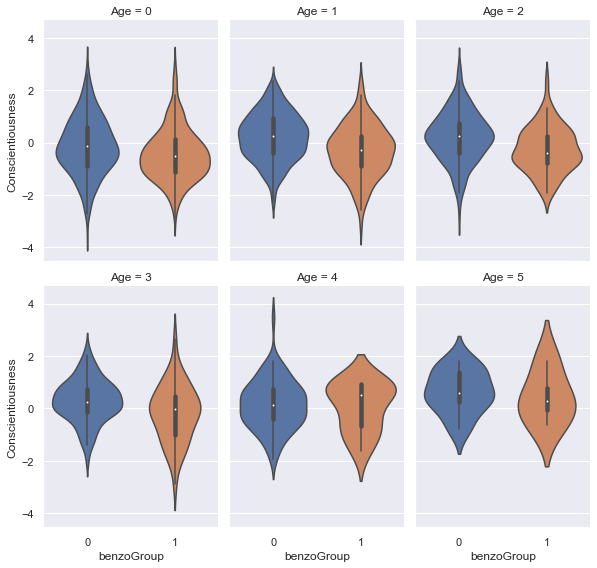

In [543]:
#Plotting distribution and a kernel density estimation on benzoPl ('Conscientiousness')
g = sns.catplot(x="benzoGroup", y= 'Conscientiousness',
                col="Age", col_wrap=3,data=datasB, kind="violin",
                split=True, height=4, aspect=.7);

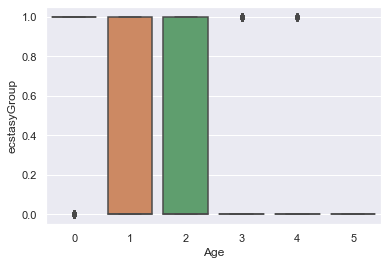

In [544]:
sns.boxplot(x="Age",y="ecstasyGroup",data=datas)

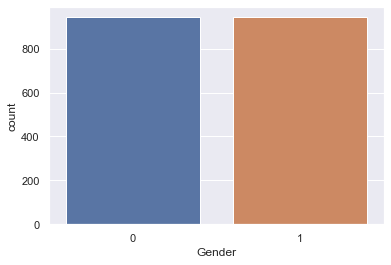

In [545]:
sns.countplot(x="Gender",data=datas)

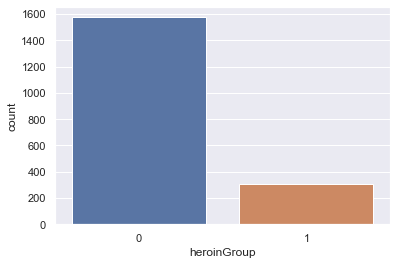

In [546]:
sns.countplot(x="heroinGroup", data=datas)

Text(0.5, 1, 'Corrélation Attributs')

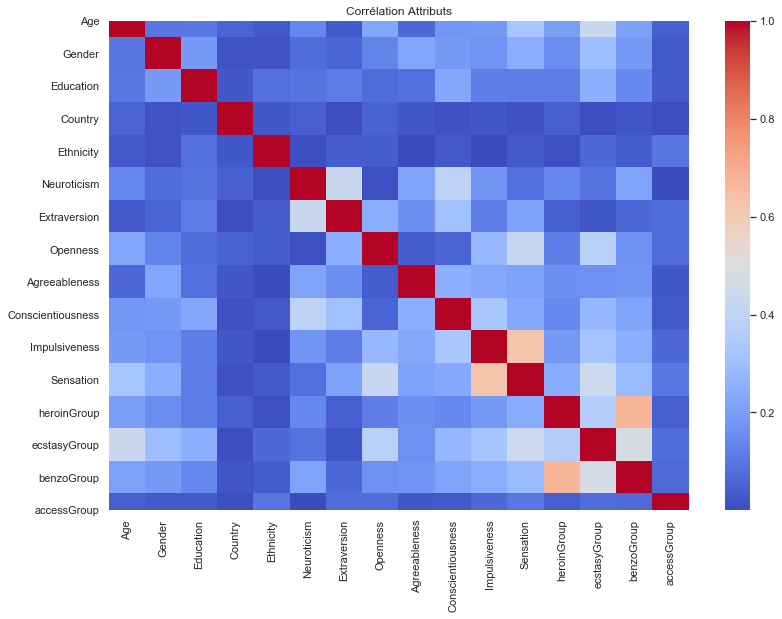

In [549]:
sns.set(rc = {'figure.figsize':(13,9)})
corre=datas.corr()
corre=abs(corre)
sns.heatmap(corre,cmap='coolwarm')
plt.title("Corrélation Attributs")

# PREDICTIONS

In [550]:
# Let's define the features with the variable X

features=["Age","Gender","Education","Neuroticism","Extraversion","Openness","Agreeableness","Conscientiousness","Impulsiveness","Sensation"]

In [551]:
X=datas.loc[:,features]
X

,Age,Gender,Education,Neuroticism,Extraversion,Openness,Agreeableness,Conscientiousness,Impulsiveness,Sensation
ID,,,,,,,,,,
1,2,0,5,0.31287,-0.57545,-0.58331,-0.91699,-0.00665,-0.21712,-1.18084
2,1,1,8,-0.67825,1.93886,1.43533,0.76096,-0.14277,-0.71126,-0.21575
3,2,1,5,-0.46725,0.80523,-0.84732,-1.62090,-1.01450,-1.37983,0.40148
4,0,0,7,-0.14882,-0.80615,-0.01928,0.59042,0.58489,-1.37983,-1.18084
5,2,0,8,0.73545,-1.63340,-0.45174,-0.30172,1.30612,-0.21712,-0.21575
...,...,...,...,...,...,...,...,...,...,...
1884,0,0,4,-1.19430,1.74091,1.88511,0.76096,-1.13788,0.88113,1.92173
1885,0,1,4,-0.24649,1.74091,0.58331,0.76096,-1.51840,0.88113,0.76540
1886,1,0,6,1.13281,-1.37639,-1.27553,-1.77200,-1.38502,0.52975,-0.52593


### Machine learning algorithms cannot work with categorical data directly, categorical data must be converted to numbers.
This applies when you are working with a sequence classification type problem and plan on using deep learning methods.
Therefore, One-hot encoding is a representation of categorical variables as binary vectors.

We gonna use them to work properly :

In [552]:
# Using get_dummies, for Education and Age columns for target dataset

dum_education = pd.get_dummies(X["Education"], prefix = 'Education')
dum_age = pd.get_dummies(X["Age"], prefix = 'Age')

X = pd.concat([X, dum_education], axis = 1)
X = pd.concat([X, dum_age], axis = 1)

In [553]:
#Drop columns Education and Age after one-hot encoding

X = X.drop(['Education', 'Age'], axis=1)

X.head(10)

,Gender,Neuroticism,Extraversion,Openness,Agreeableness,Conscientiousness,Impulsiveness,Sensation,Education_0,Education_1,...,Education_5,Education_6,Education_7,Education_8,Age_0,Age_1,Age_2,Age_3,Age_4,Age_5
ID,,,,,,,,,,,,,,,,,,,,,
1,0,0.31287,-0.57545,-0.58331,-0.91699,-0.00665,-0.21712,-1.18084,0,0,...,1,0,0,0,0,0,1,0,0,0
2,1,-0.67825,1.93886,1.43533,0.76096,-0.14277,-0.71126,-0.21575,0,0,...,0,0,0,1,0,1,0,0,0,0
3,1,-0.46725,0.80523,-0.84732,-1.62090,-1.01450,-1.37983,0.40148,0,0,...,1,0,0,0,0,0,1,0,0,0
4,0,-0.14882,-0.80615,-0.01928,0.59042,0.58489,-1.37983,-1.18084,0,0,...,0,0,1,0,1,0,0,0,0,0
5,0,0.73545,-1.63340,-0.45174,-0.30172,1.30612,-0.21712,-0.21575,0,0,...,0,0,0,1,0,0,1,0,0,0
6,0,-0.67825,-0.30033,-1.55521,2.03972,1.63088,-1.37983,-1.54858,0,0,...,0,0,0,0,0,0,0,0,0,1
7,1,-0.46725,-1.09207,-0.45174,-0.30172,0.93949,-0.21712,0.07987,0,0,...,0,0,1,0,0,0,0,1,0,0
8,1,-1.32828,1.93886,-0.84732,-0.30172,1.63088,0.19268,-0.52593,0,1,...,0,0,0,0,0,0,1,0,0,0
9,0,0.62967,2.57309,-0.97631,0.76096,1.13407,-1.37983,-1.54858,0,0,...,1,0,0,0,0,0,1,0,0,0


## Here we define different target variables between differents groups of drugs

In [554]:
Y1=datas.loc[:,"heroinGroup"]
Y2=datas.loc[:,"ecstasyGroup"]
Y3=datas.loc[:,"benzoGroup"]
Y4=datas.loc[:,"accessGroup"]

print(Y1)
print(Y2)
print(Y3)
print(Y4)

ID
1       0
2       0
3       0
4       0
5       0
       ..
1884    0
1885    1
1886    1
1887    0
1888    0
Name: heroinGroup, Length: 1885, dtype: int64
ID
1       0
2       1
3       0
4       0
5       0
       ..
1884    1
1885    1
1886    1
1887    1
1888    0
Name: ecstasyGroup, Length: 1885, dtype: int64
ID
1       0
2       0
3       0
4       0
5       0
       ..
1884    0
1885    1
1886    1
1887    0
1888    0
Name: benzoGroup, Length: 1885, dtype: int64
ID
1       1
2       1
3       1
4       1
5       1
       ..
1884    1
1885    1
1886    1
1887    1
1888    1
Name: accessGroup, Length: 1885, dtype: int64


## Train and Test split

#### Before creating Machine Learning models we have to split our datas in train and test datas :

In [555]:
#Setting random_state a fixed value will guarantee that same sequence of random numbers are generated each time you run the code.

X1_train, X1_test, y1_train, y1_test = train_test_split(X,Y1,test_size=0.25, random_state=24)

X2_train, X2_test, y2_train, y2_test = train_test_split(X,Y2,test_size=0.25, random_state=24)

X3_train, X3_test, y3_train, y3_test = train_test_split(X,Y3,test_size=0.25, random_state=24)

X4_train, X4_test, y4_train, y4_test = train_test_split(X,Y4,test_size=0.25, random_state=24)

## Machine Learning Models predictions

### Now, we gonna try multiple Machine Learning Models in order to find the best model for each group of drugs.

### The goal is to have the most accurate model to make better predictions.


* First   -> we gonna work on the "heroinGroup".
* Then    -> we will work on the "ecstasyGroup".
* Finally -> we gonna work on the "benzoGroup".

### To work on those groups of drugs, we make 3 functions that we gonna use several times to calculte the accuracy of the models and to print confusion matrix.

In [556]:
from sklearn.metrics import confusion_matrix

# This function returns the confusion matrix of the model

def accuracymodel(model,X,y):
    y_pred=model.predict(X)
    cf_matrix = confusion_matrix(y, y_pred)
    return cf_matrix

In [557]:
# This function allows us to get two confusion matrix. One for train datas and one for test datas.

def evaluate_model(model, X_train, y_train, X_test, y_test, scale=False):
        if (scale == True):

          sc = StandardScaler()

          X_train = sc.fit_transform(X_train)

          X_test = sc.transform(X_test)

        model.fit(X_train, y_train)

        matrixTrain = accuracymodel(model, X_train, y_train)

        matrixTest = accuracymodel(model, X_test, y_test)

        return matrixTrain, matrixTest

In [558]:
# This function will make a pretty plot of an sklearn Confusion Matrix "matrix" using a Seaborn heatmap visualization.
# Moreover, we can see what percentage of our datas is represented in each quadrant.

def print_matrix(matrix):
    
    group_names = ['True Neg','False Pos','False Neg','True Pos']

    group_counts = ["{0:0.0f}".format(value) for value in
                    matrix.flatten()]

    group_percentages = ["{0:.2%}".format(value) for value in
                         matrix.flatten()/np.sum(matrix)]

    labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
              zip(group_names,group_counts,group_percentages)]

    labels = np.asarray(labels).reshape(2,2)
    ax= sns.heatmap(matrix, annot=labels, fmt='', cmap='Blues')

    ax.set_title('Confusion Matrix with labels\n\n');
    ax.set_xlabel('\nPredicted Values')
    ax.set_ylabel('Actual Values ');
    
    #Metrics for Binary Confusion Matrices
    
    accuracy = (matrix[0,0]+matrix[1,1])/(matrix[0,0]+matrix[1,1]+matrix[0,1]+matrix[1,0])
    precision = matrix[1,1] / sum(matrix[:,1])
    recall    = matrix[1,1] / sum(matrix[1,:])
    f1_score  = 2*precision*recall / (precision + recall)
    stats_text = "\n\nAccuracy={:0.3f}\nPrecision={:0.3f}\nRecall={:0.3f}\nF1 Score={:0.3f}".format(
                accuracy,precision,recall,f1_score)
    
    plt.xlabel('Predicted label' + stats_text)

    plt.show()

In [559]:
sns.set(rc = {'figure.figsize':(5,4)})

In [560]:
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import KFold, StratifiedKFold, cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC

# <span style='color:Red'> 1 - HeroinGroup  </span>

### a) Logistic Regression

We gonna use GridSearchCV to find the best parameters for Logistic Regression Model.
The GridSearchCV function automates the search for an optimum among the hyperparameters, it uses in particular the cross validation.

In [561]:
# Cross-validation, using GridSearchCV

# We use a pipeline in order to scale datas each time.
pipe = Pipeline(steps = [('scale', StandardScaler()), ('classifier' , LogisticRegression())])

param_grid = [
    
    {
     'classifier__penalty' : ['l1', 'l2'],
     'classifier__C' : [0.001, 0.01, 0.1, 1, 10, 100, 1000],
     'classifier__solver' : ['liblinear'],
     'classifier__class_weight': ['balanced']
    },
    
]

scv = StratifiedKFold(n_splits=5)

logic_heroinGroup_Grid = GridSearchCV(pipe, param_grid = param_grid, scoring = 'f1', cv = scv, verbose=True, n_jobs=-1)

best_logic_heroinGroup_Grid = logic_heroinGroup_Grid.fit(X1_train, y1_train)

best_logic_heroinGroup_Grid

print("Best score : \n", best_logic_heroinGroup_Grid.best_score_)

print("Best parameters :\n", best_logic_heroinGroup_Grid.best_params_)

Fitting 5 folds for each of 14 candidates, totalling 70 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    4.0s


Best score : 
 0.40055612562134957
Best parameters :
 {'classifier__C': 0.1, 'classifier__class_weight': 'balanced', 'classifier__penalty': 'l1', 'classifier__solver': 'liblinear'}


[Parallel(n_jobs=-1)]: Done  70 out of  70 | elapsed:    4.3s finished


## The best parameters are :
* 'classifier__C'            : 0.1
* 'classifier__class_weight' : 'balanced'
* 'classifier__penalty'      : 'l1'
* 'classifier__solver'       : 'liblinear'

## We use those parameters to predict our datas :

TRAIN Confusion Matrix :


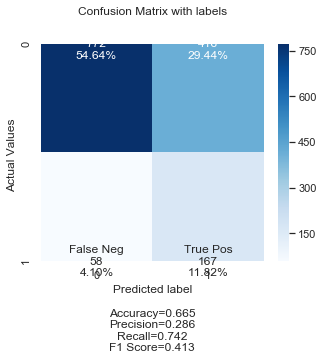

TEST Confusion Matrix :


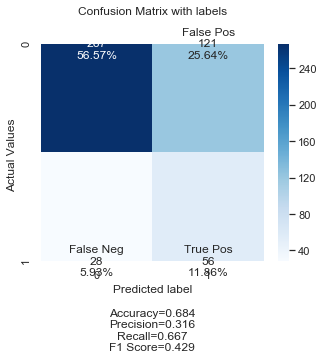

In [562]:
lrCV_heroinGroup = evaluate_model(best_logic_heroinGroup_Grid.best_estimator_, X1_train, y1_train, X1_test, y1_test, scale=False)

print("TRAIN Confusion Matrix :")
print_matrix(lrCV_heroinGroup[0])
print("TEST Confusion Matrix :")
print_matrix(lrCV_heroinGroup[1])

## Finally for Logistic Regression we have :
- For train datas : the accuracy is 0.665 and F1 score is 0.413.
- For test datas : the accuracy is 0.684 and F1 score is 0.429.

This is a good score but we will see if we can improve those scores with different ML models.

## b) RandomForestClassifier

In [392]:
rfc = RandomForestClassifier(class_weight='balanced')

# Create param grid.

param_grid = {
    'max_depth' : list(range(1,15)), 
    'n_estimators' : list(range(1,80)),
    'class_weight': ['balanced'],
    'max_features': ['auto', 'sqrt', 'log2'],
    'criterion':['gini', 'entropy']
    }

scv = StratifiedKFold(n_splits=5)

random_heroinGroup_Grid = GridSearchCV(rfc, param_grid = param_grid, scoring = 'f1', cv = scv, verbose=True, n_jobs=-1)

# Fit on data

best_random_heroinGroup_Grid = random_heroinGroup_Grid.fit(X1_train, y1_train)

best_random_heroinGroup_Grid

Fitting 5 folds for each of 6636 candidates, totalling 33180 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    3.8s
[Parallel(n_jobs=-1)]: Done 1319 tasks      | elapsed:   15.4s
[Parallel(n_jobs=-1)]: Done 2855 tasks      | elapsed:   33.7s
[Parallel(n_jobs=-1)]: Done 4255 tasks      | elapsed:   52.9s
[Parallel(n_jobs=-1)]: Done 6055 tasks      | elapsed:  1.3min
[Parallel(n_jobs=-1)]: Done 8255 tasks      | elapsed:  1.9min
[Parallel(n_jobs=-1)]: Done 10855 tasks      | elapsed:  2.6min
[Parallel(n_jobs=-1)]: Done 12677 tasks      | elapsed:  3.2min
[Parallel(n_jobs=-1)]: Done 14951 tasks      | elapsed:  3.9min
[Parallel(n_jobs=-1)]: Done 18231 tasks      | elapsed:  4.8min
[Parallel(n_jobs=-1)]: Done 22431 tasks      | elapsed:  5.8min
[Parallel(n_jobs=-1)]: Done 27031 tasks      | elapsed:  7.1min
[Parallel(n_jobs=-1)]: Done 30033 tasks      | elapsed:  8.1min
[Parallel(n_jobs=-1)]: Done 32733 tasks      | elapsed:  9.0min
[Parallel(n_jobs=-1)]: Done 33165 o

GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=None, shuffle=False),
             error_score='raise-deprecating',
             estimator=RandomForestClassifier(bootstrap=True,
                                              class_weight='balanced',
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weigh...
             iid='warn', n_jobs=-1,
             param_grid={'class_weight': ['balanced'],
                         'criterion': ['gini', 'entropy'],
                         'max_depth': [1, 

In [583]:
import pickle

In [585]:
pickle.dump(best_random_heroinGroup_Grid, open('model.sav', 'wb'))

In [393]:
print("Best parameters :\n", best_random_heroinGroup_Grid.best_params_)

Best parameters :
 {'class_weight': 'balanced', 'criterion': 'gini', 'max_depth': 4, 'max_features': 'sqrt', 'n_estimators': 32}


## The best parameters are :
* 'class_weight': 'balanced'
* 'criterion': 'gini'
* 'max_depth': 4
* 'max_features': 'sqrt'
* 'n_estimators': 32


## We use those parameters to predict our datas :

TRAIN Confusion Matrix :


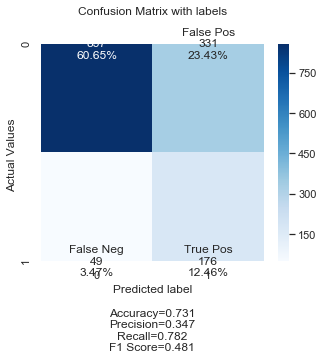

TEST Confusion Matrix :


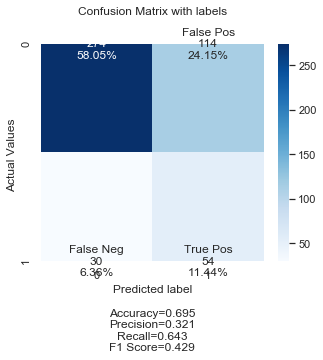

In [395]:
randomCV_heroinGroup = evaluate_model(best_random_heroinGroup_Grid.best_estimator_, X1_train, y1_train, X1_test, y1_test, scale=False)

print("TRAIN Confusion Matrix :")
print_matrix(randomCV_heroinGroup[0])
print("TEST Confusion Matrix :")
print_matrix(randomCV_heroinGroup[1])

## Finally for RandomForestClassifier we have :
- For train datas : the accuracy is 0.731 and F1 score is 0.481.
- For test datas : the accuracy is 0.695 and F1 score is 0.429.

This is also good score but we will see if we can improve those scores with KNeighbors model.

## c) KNeighbors Classifier

k-Nearest Neighbors (kNN) is an algorithm by which an unclassified data point is classified based on it’s distance from known points. While it’s most often used as a classifier, it can be used to solve regression problems as well.

Some of the most common hyperparameters are :
* n_neighbors : which is the number of neighbors
* weights : which can be set to either ‘uniform’, where each neighbor within the boundary carries the same weight or ‘distance’ where closer points will be more heavily weighted toward the decision.
* metric : which refers to how the distance of neighboring points is chosen from the unknown point.

In [428]:
param_grid = {
    'n_neighbors': list(range(1,30)),
    'weights': ['uniform','distance'],
    'metric':['euclidean','manhattan']
}

scv = StratifiedKFold(n_splits=5)

knn_heroinGroup_Grid = GridSearchCV(KNeighborsClassifier(), param_grid = param_grid, cv=scv, verbose=1, n_jobs=-1)

best_knn_heroinGroup_Grid = knn_heroinGroup_Grid.fit(X1_train, y1_train)

best_knn_heroinGroup_Grid

Fitting 5 folds for each of 116 candidates, totalling 580 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    3.7s
[Parallel(n_jobs=-1)]: Done 580 out of 580 | elapsed:    6.1s finished


GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=None, shuffle=False),
             error_score='raise-deprecating',
             estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30,
                                            metric='minkowski',
                                            metric_params=None, n_jobs=None,
                                            n_neighbors=5, p=2,
                                            weights='uniform'),
             iid='warn', n_jobs=-1,
             param_grid={'metric': ['euclidean', 'manhattan'],
                         'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,
                                         13, 14, 15, 16, 17, 18, 19, 20, 21, 22,
                                         23, 24, 25, 26, 27, 28, 29],
                         'weights': ['uniform', 'distance']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=1)

In [429]:
print("Best parameters :\n", best_knn_heroinGroup_Grid.best_params_)

Best parameters :
 {'metric': 'manhattan', 'n_neighbors': 21, 'weights': 'uniform'}


TRAIN Confusion Matrix :


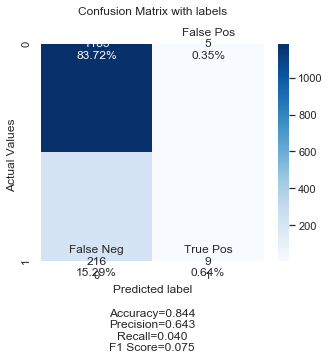

TEST Confusion Matrix :


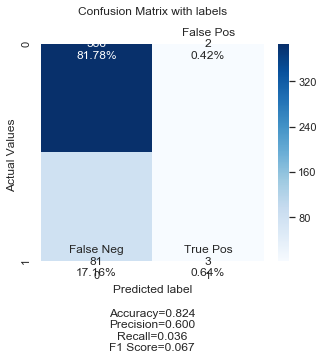

In [432]:
knnCV_heroinGroup = evaluate_model(best_knn_heroinGroup_Grid.best_estimator_, X1_train, y1_train, X1_test, y1_test, scale=False)

print("TRAIN Confusion Matrix :")
print_matrix(knnCV_heroinGroup[0])
print("TEST Confusion Matrix :")
print_matrix(knnCV_heroinGroup[1])

## d) SVC

In [433]:
param_grid = {'C': [0.1, 1, 10, 100, 1000],
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
              'kernel': ['rbf']}

scv = StratifiedKFold(n_splits=5)

svc_heroinGroup_Grid = GridSearchCV(SVC(), param_grid, cv=scv, refit = True, verbose = 3)
 
# fitting the model for grid search

best_svc_heroinGroup_Grid=svc_heroinGroup_Grid.fit(X1_train, y1_train)

Fitting 5 folds for each of 25 candidates, totalling 125 fits
[CV] C=0.1, gamma=1, kernel=rbf ......................................
[CV] .......... C=0.1, gamma=1, kernel=rbf, score=0.841, total=   0.1s
[CV] C=0.1, gamma=1, kernel=rbf ......................................
[CV] .......... C=0.1, gamma=1, kernel=rbf, score=0.841, total=   0.0s
[CV] C=0.1, gamma=1, kernel=rbf ......................................
[CV] .......... C=0.1, gamma=1, kernel=rbf, score=0.841, total=   0.1s
[CV] C=0.1, gamma=1, kernel=rbf ......................................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s


[CV] .......... C=0.1, gamma=1, kernel=rbf, score=0.840, total=   0.1s
[CV] C=0.1, gamma=1, kernel=rbf ......................................
[CV] .......... C=0.1, gamma=1, kernel=rbf, score=0.840, total=   0.1s
[CV] C=0.1, gamma=0.1, kernel=rbf ....................................
[CV] ........ C=0.1, gamma=0.1, kernel=rbf, score=0.841, total=   0.0s
[CV] C=0.1, gamma=0.1, kernel=rbf ....................................
[CV] ........ C=0.1, gamma=0.1, kernel=rbf, score=0.841, total=   0.0s
[CV] C=0.1, gamma=0.1, kernel=rbf ....................................
[CV] ........ C=0.1, gamma=0.1, kernel=rbf, score=0.841, total=   0.0s
[CV] C=0.1, gamma=0.1, kernel=rbf ....................................
[CV] ........ C=0.1, gamma=0.1, kernel=rbf, score=0.840, total=   0.0s
[CV] C=0.1, gamma=0.1, kernel=rbf ....................................
[CV] ........ C=0.1, gamma=0.1, kernel=rbf, score=0.840, total=   0.0s
[CV] C=0.1, gamma=0.01, kernel=rbf ...................................
[CV] .

[Parallel(n_jobs=1)]: Done 125 out of 125 | elapsed:    9.8s finished


In [434]:
print("Best parameters :\n", best_svc_heroinGroup_Grid.best_params_)

Best parameters :
 {'C': 100, 'gamma': 0.01, 'kernel': 'rbf'}


TRAIN Confusion Matrix :


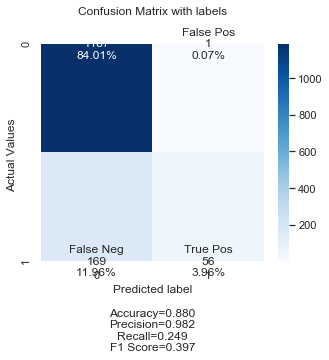

TEST Confusion Matrix :


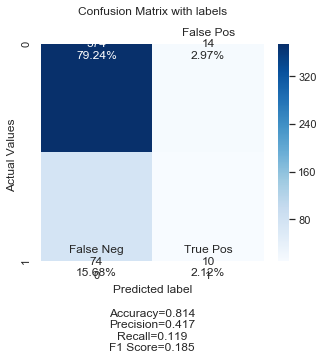

In [435]:
svCCV_heroinGroup = evaluate_model(best_svc_heroinGroup_Grid.best_estimator_, X1_train, y1_train, X1_test, y1_test, scale=True)

print("TRAIN Confusion Matrix :")
print_matrix(svCCV_heroinGroup[0])
print("TEST Confusion Matrix :")
print_matrix(svCCV_heroinGroup[1])

Thanks to SVC we get a good accuracy but F1 score is still very low contrary to LogisticRegression and RandomForest models.

## How can we compare models?
Models can be compared by displaying their ROC curves. 
An ROC curve (receiver operating characteristic curve) is a graph showing the performance of a classification model at all classification thresholds. This curve plots two parameters:
* True Positive Rate
* False Positive Rate

Then, you can choose which model performs best. To choose the best model, we need to look at the Area Under the Curve (AUC). The larger the area under the curve, the better the model.
We will therefore display the ROC curves for each model to determine which one performs best.

## HeroinGroup ROC Curve 

In [436]:
y_score1=best_logic_heroinGroup_Grid.predict(X1_test)
y_score2=best_random_heroinGroup_Grid.predict(X1_test)
y_score3=best_knn_heroinGroup_Grid.predict(X1_test)
y_score4=best_svc_heroinGroup_Grid.predict(X1_test)

false_positive_rate1, true_positive_rate1, threshold1 = roc_curve(y1_test, y_score1)
false_positive_rate2, true_positive_rate2, threshold2 = roc_curve(y1_test, y_score2)
false_positive_rate3, true_positive_rate3, threshold3 = roc_curve(y1_test, y_score3)
false_positive_rate4, true_positive_rate4, threshold4 = roc_curve(y1_test, y_score4)

In [442]:
print('ROC AUC Score for Logistic Regression : ', roc_auc_score(y1_test, y_score1))
print('ROC AUC Score for RandomForestClassifier : ', roc_auc_score(y1_test, y_score2))
print('ROC AUC Score for KNeighborsClassifier : ', roc_auc_score(y1_test, y_score3))
print('ROC AUC Score for SVC Classifier : ', roc_auc_score(y1_test, y_score4))

ROC AUC Score for Logistic Regression :  0.6774054982817869
ROC AUC Score for RandomForestClassifier :  0.674521354933726
ROC AUC Score for KNeighborsClassifier :  0.515279823269514
ROC AUC Score for SVC Classifier :  0.5165684830633285


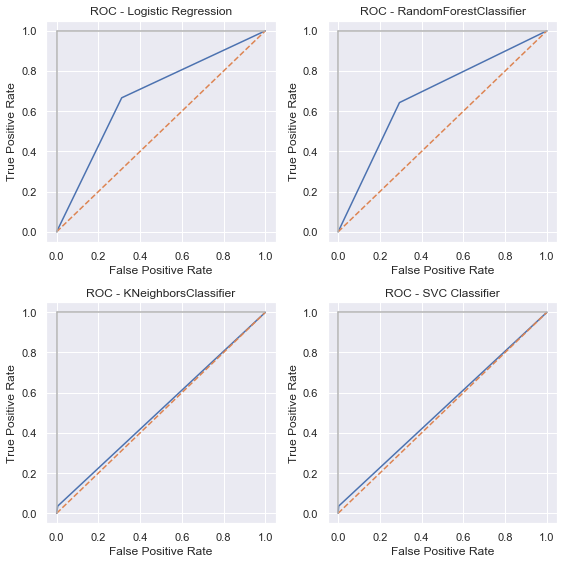

In [459]:
#plt.subplots(221, figsize=(8,6))
fig = plt.figure()
sns.set(rc = {'figure.figsize':(8,8)})
plt.subplot(2, 2, 1)
plt.title('ROC - Logistic Regression')
plt.plot(false_positive_rate1, true_positive_rate1)
plt.plot([0, 1], ls="--")
plt.plot([0, 0], [1, 0] , c=".7"), plt.plot([1, 1] , c=".7")
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')


plt.subplot(2, 2, 2)
plt.title('ROC - RandomForestClassifier')
plt.plot(false_positive_rate2, true_positive_rate2)
plt.plot([0, 1], ls="--")
plt.plot([0, 0], [1, 0] , c=".7"), plt.plot([1, 1] , c=".7")
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')


plt.subplot(2, 2, 3)
plt.title('ROC - KNeighborsClassifier')
plt.plot(false_positive_rate3, true_positive_rate3)
plt.plot([0, 1], ls="--")
plt.plot([0, 0], [1, 0] , c=".7"), plt.plot([1, 1] , c=".7")
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')


plt.subplot(2, 2, 4)
plt.title('ROC - SVC Classifier')
plt.plot(false_positive_rate4, true_positive_rate4)
plt.plot([0, 1], ls="--")
plt.plot([0, 0], [1, 0] , c=".7"), plt.plot([1, 1] , c=".7")
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')

fig.tight_layout()
plt.show()

## Interpretation :
### According to the ROC Curves : we can see that Logistic Regression curve seems like the RandomForestClassifier curve. 
### Those 2 models work better than KNeighbors and SVC models. Indeed, skilful models are represented by curves that bow up to the top left of the plot. 
### We clearly see here that Logistic Regression model and RandomForestClassifier model are better.

### Let's plot F1 score on test datas to determine which models is better between LogisticRegression and RandomForest :

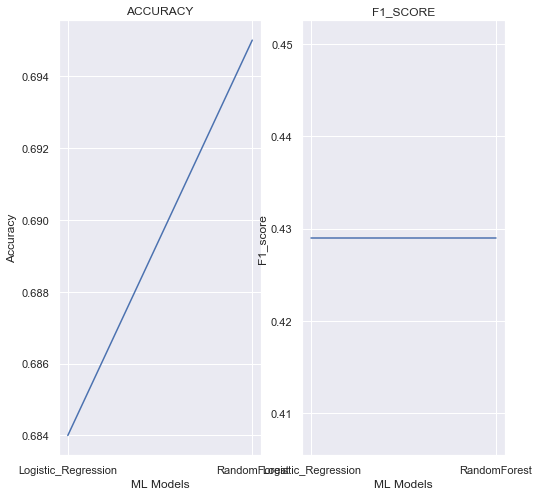

In [580]:
f1score=[0.429,0.429]
accuracy=[0.684,0.695]
labels=['Logistic_Regression','RandomForest']


sns.set(rc = {'figure.figsize':(8,8)})

plt.subplot(1, 2, 1)
plt.plot(labels,accuracy)
plt.title('ACCURACY')
plt.ylabel('Accuracy')
plt.xlabel('ML Models')

plt.subplot(1, 2, 2)
plt.plot(labels,f1score)
plt.title('F1_SCORE')
plt.ylabel('F1_score')
plt.xlabel('ML Models')

plt.show()

## Conclusion :

### For HeroinGroup, to make predictions for the future, we will choose RandomForest model because the accuracy is better even if they have the same F1 score.

#### To summarize, here is hyperparameters we choose for our RandomForestClassifier model :
* 'class_weight': 'balanced'
* 'criterion': 'gini'
* 'max_depth': 4
* 'max_features': 'sqrt'
* 'n_estimators': 32

# <span style='color:Red'> 2 - EcstasyGroup  </span>

### a) Logistic Regression

In [460]:
# Cross-validation, using GridSearchCV

# We use a pipeline in order to scale datas each time.
pipe = Pipeline(steps = [('scale', StandardScaler()), ('classifier' , LogisticRegression())])

param_grid = [
    
    {
     'classifier__penalty' : ['l1', 'l2'],
     'classifier__C' : [0.001, 0.01, 0.1, 1, 10, 100, 1000],
     'classifier__solver' : ['liblinear'],
     'classifier__class_weight': ['balanced']
    },
    
]

scv = KFold(n_splits=5)

logic_ecstasyGroup_Grid = GridSearchCV(pipe, param_grid = param_grid, scoring = 'f1', cv = scv, verbose=True, n_jobs=-1)

best_logic_ecstasyGroup_Grid = logic_ecstasyGroup_Grid.fit(X2_train, y2_train)

best_logic_ecstasyGroup_Grid

print("Best score : \n", best_logic_ecstasyGroup_Grid.best_score_)

print("Best parameters :\n", best_logic_ecstasyGroup_Grid.best_params_)

Fitting 5 folds for each of 14 candidates, totalling 70 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.


Best score : 
 0.772062951988508
Best parameters :
 {'classifier__C': 10, 'classifier__class_weight': 'balanced', 'classifier__penalty': 'l1', 'classifier__solver': 'liblinear'}


[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    3.7s
[Parallel(n_jobs=-1)]: Done  70 out of  70 | elapsed:    3.9s finished


## The best parameters are :
* 'classifier__C'            : 10
* 'classifier__class_weight' : 'balanced'
* 'classifier__penalty'      : 'l1'
* 'classifier__solver'       : 'liblinear'

## We use those parameters to predict our datas :

In [464]:
sns.set(rc = {'figure.figsize':(6,5)})

TRAIN Confusion Matrix :


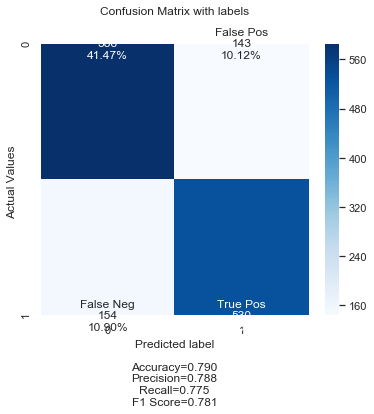

TEST Confusion Matrix :


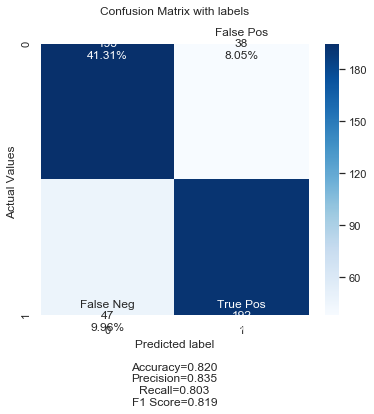

In [465]:
lrCV_ecstasyGroup = evaluate_model(best_logic_ecstasyGroup_Grid.best_estimator_, X2_train, y2_train, X2_test, y2_test, scale=False)

print("TRAIN Confusion Matrix :")
print_matrix(lrCV_ecstasyGroup[0])
print("TEST Confusion Matrix :")
print_matrix(lrCV_ecstasyGroup[1])

## Finally for Logistic Regression we have :
- For train datas : the accuracy is 0.790 and F1 score is 0.781.
- For test datas : the accuracy is 0.820 and F1 score is 0.819.

This is a good score but we will see if we can improve those scores with others ML models.

## b) RandomForestClassifier

In [466]:
rfc = RandomForestClassifier(class_weight='balanced')

# Create param grid.

param_grid = {
    'max_depth' : list(range(1,15)), 
    'n_estimators' : list(range(1,80)),
    'class_weight': ['balanced'],
    'max_features': ['auto', 'sqrt', 'log2'],
    'criterion':['gini', 'entropy']
    }

scv = KFold(n_splits=5)

random_ecstasyGroup_Grid = GridSearchCV(rfc, param_grid = param_grid, scoring = 'f1', cv = scv, verbose=True, n_jobs=-1)

# Fit on data

best_random_ecstasyGroup_Grid = random_ecstasyGroup_Grid.fit(X2_train, y2_train)

best_random_ecstasyGroup_Grid

Fitting 5 folds for each of 6636 candidates, totalling 33180 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    3.5s
[Parallel(n_jobs=-1)]: Done 1047 tasks      | elapsed:   12.8s
[Parallel(n_jobs=-1)]: Done 2539 tasks      | elapsed:   29.2s
[Parallel(n_jobs=-1)]: Done 3939 tasks      | elapsed:   48.7s
[Parallel(n_jobs=-1)]: Done 5739 tasks      | elapsed:  1.2min
[Parallel(n_jobs=-1)]: Done 7939 tasks      | elapsed:  1.9min
[Parallel(n_jobs=-1)]: Done 10417 tasks      | elapsed:  2.6min
[Parallel(n_jobs=-1)]: Done 12077 tasks      | elapsed:  3.1min
[Parallel(n_jobs=-1)]: Done 13777 tasks      | elapsed:  3.7min
[Parallel(n_jobs=-1)]: Done 15677 tasks      | elapsed:  4.3min
[Parallel(n_jobs=-1)]: Done 18847 tasks      | elapsed:  5.1min
[Parallel(n_jobs=-1)]: Done 23447 tasks      | elapsed:  6.3min
[Parallel(n_jobs=-1)]: Done 26867 tasks      | elapsed:  7.4min
[Parallel(n_jobs=-1)]: Done 29567 tasks      | elapsed:  8.3min
[Parallel(n_jobs=-1)]: Done 32467 t

GridSearchCV(cv=KFold(n_splits=5, random_state=None, shuffle=False),
             error_score='raise-deprecating',
             estimator=RandomForestClassifier(bootstrap=True,
                                              class_weight='balanced',
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction...
             iid='warn', n_jobs=-1,
             param_grid={'class_weight': ['balanced'],
                         'criterion': ['gini', 'entropy'],
                         'max_depth': [1, 

In [467]:
print("Best parameters :\n", best_random_ecstasyGroup_Grid.best_params_)

Best parameters :
 {'class_weight': 'balanced', 'criterion': 'gini', 'max_depth': 7, 'max_features': 'sqrt', 'n_estimators': 29}


## The best parameters are :
* 'class_weight': 'balanced'
* 'criterion': 'gini'
* 'max_depth': 7
* 'max_features': 'sqrt'
* 'n_estimators': 29


## We use those parameters to predict our datas :

TRAIN Confusion Matrix :


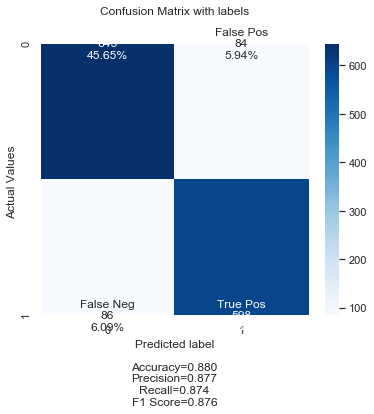

TEST Confusion Matrix :


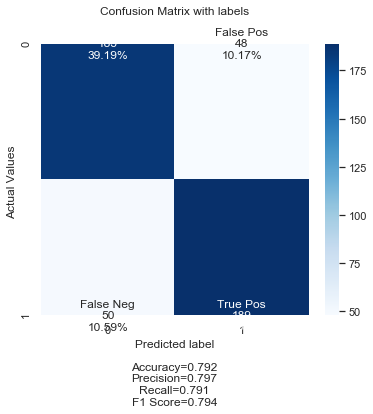

In [468]:
randomCV_ecstasyGroup = evaluate_model(best_random_ecstasyGroup_Grid.best_estimator_, X2_train, y2_train, X2_test, y2_test, scale=False)

print("TRAIN Confusion Matrix :")
print_matrix(randomCV_ecstasyGroup[0])
print("TEST Confusion Matrix :")
print_matrix(randomCV_ecstasyGroup[1])

## Finally for RandomForestClassifier we have :
- For train datas : the accuracy is 0.880 and F1 score is 0.876.
- For test datas : the accuracy is 0.792 and F1 score is 0.794.

Those scores are lower than the LogisticRegression model but this is also a good score.

Now, we will try to improve those scores with KNeighbors model.

## c) KNeighbors Classifier

In [469]:
param_grid = {
    'n_neighbors': list(range(1,30)),
    'weights': ['uniform','distance'],
    'metric':['euclidean','manhattan']
}

scv = KFold(n_splits=5)

knn_ecstasyGroup_Grid = GridSearchCV(KNeighborsClassifier(), param_grid = param_grid, cv=scv, verbose=1, n_jobs=-1)

best_knn_ecstasyGroup_Grid = knn_ecstasyGroup_Grid.fit(X2_train, y2_train)

best_knn_ecstasyGroup_Grid

Fitting 5 folds for each of 116 candidates, totalling 580 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done 196 tasks      | elapsed:    1.0s
[Parallel(n_jobs=-1)]: Done 580 out of 580 | elapsed:    2.5s finished


GridSearchCV(cv=KFold(n_splits=5, random_state=None, shuffle=False),
             error_score='raise-deprecating',
             estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30,
                                            metric='minkowski',
                                            metric_params=None, n_jobs=None,
                                            n_neighbors=5, p=2,
                                            weights='uniform'),
             iid='warn', n_jobs=-1,
             param_grid={'metric': ['euclidean', 'manhattan'],
                         'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,
                                         13, 14, 15, 16, 17, 18, 19, 20, 21, 22,
                                         23, 24, 25, 26, 27, 28, 29],
                         'weights': ['uniform', 'distance']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=1)

In [470]:
print("Best parameters :\n", best_knn_ecstasyGroup_Grid.best_params_)

Best parameters :
 {'metric': 'euclidean', 'n_neighbors': 19, 'weights': 'distance'}


## The best parameters are :
* 'metric': 'euclidean'
* 'n_neighbors': 19
* 'weights': 'distance'


TRAIN Confusion Matrix :


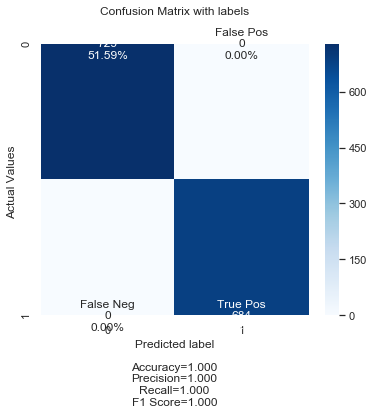

TEST Confusion Matrix :


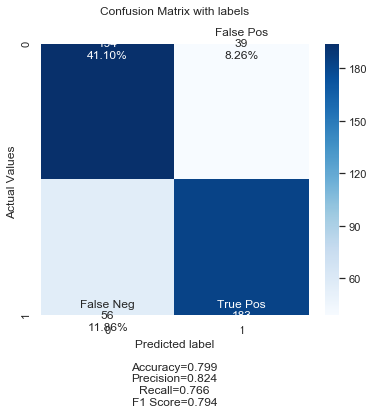

In [473]:
knnCV_ecstasyGroup = evaluate_model(best_knn_ecstasyGroup_Grid.best_estimator_, X2_train, y2_train, X2_test, y2_test, scale=False)

print("TRAIN Confusion Matrix :")
print_matrix(knnCV_ecstasyGroup[0])
print("TEST Confusion Matrix :")
print_matrix(knnCV_ecstasyGroup[1])

### With KNeighbors model we have the same F1 score than the RandomForest but we improve the accuracy. Unfortunately we didn't improve those scores compared to LogisticRegression model. Let's try SVC model.


## d) SVC

In [474]:
param_grid = {'C': [0.1, 1, 10, 100, 1000],
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
              'kernel': ['rbf']}

scv = KFold(n_splits=5)

svc_ecstasyGroup_Grid = GridSearchCV(SVC(), param_grid, cv=scv, refit = True, verbose = 3)
 
# fitting the model for grid search

best_svc_ecstasyGroup_Grid=svc_ecstasyGroup_Grid.fit(X2_train, y2_train)

Fitting 5 folds for each of 25 candidates, totalling 125 fits
[CV] C=0.1, gamma=1, kernel=rbf ......................................
[CV] .......... C=0.1, gamma=1, kernel=rbf, score=0.509, total=   0.1s
[CV] C=0.1, gamma=1, kernel=rbf ......................................
[CV] .......... C=0.1, gamma=1, kernel=rbf, score=0.498, total=   0.1s
[CV] C=0.1, gamma=1, kernel=rbf ......................................
[CV] .......... C=0.1, gamma=1, kernel=rbf, score=0.541, total=   0.1s
[CV] C=0.1, gamma=1, kernel=rbf ......................................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s


[CV] .......... C=0.1, gamma=1, kernel=rbf, score=0.496, total=   0.1s
[CV] C=0.1, gamma=1, kernel=rbf ......................................
[CV] .......... C=0.1, gamma=1, kernel=rbf, score=0.535, total=   0.1s
[CV] C=0.1, gamma=0.1, kernel=rbf ....................................
[CV] ........ C=0.1, gamma=0.1, kernel=rbf, score=0.753, total=   0.0s
[CV] C=0.1, gamma=0.1, kernel=rbf ....................................
[CV] ........ C=0.1, gamma=0.1, kernel=rbf, score=0.788, total=   0.1s
[CV] C=0.1, gamma=0.1, kernel=rbf ....................................
[CV] ........ C=0.1, gamma=0.1, kernel=rbf, score=0.777, total=   0.1s
[CV] C=0.1, gamma=0.1, kernel=rbf ....................................
[CV] ........ C=0.1, gamma=0.1, kernel=rbf, score=0.805, total=   0.1s
[CV] C=0.1, gamma=0.1, kernel=rbf ....................................
[CV] ........ C=0.1, gamma=0.1, kernel=rbf, score=0.798, total=   0.1s
[CV] C=0.1, gamma=0.01, kernel=rbf ...................................
[CV] .

[Parallel(n_jobs=1)]: Done 125 out of 125 | elapsed:    8.2s finished


In [475]:
print("Best parameters :\n", best_svc_ecstasyGroup_Grid.best_params_)

Best parameters :
 {'C': 1, 'gamma': 0.1, 'kernel': 'rbf'}


TRAIN Confusion Matrix :


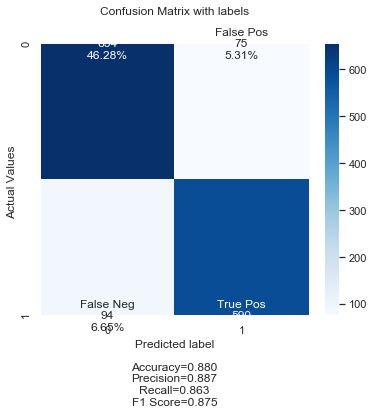

TEST Confusion Matrix :


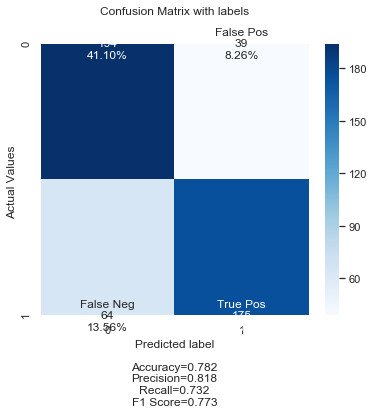

In [476]:
svCCV_ecstasyGroup = evaluate_model(best_svc_ecstasyGroup_Grid.best_estimator_, X2_train, y2_train, X2_test, y2_test, scale=True)

print("TRAIN Confusion Matrix :")
print_matrix(svCCV_ecstasyGroup[0])
print("TEST Confusion Matrix :")
print_matrix(svCCV_ecstasyGroup[1])

## Finally for SVC we have :
- For train datas : the accuracy is 0.880 and F1 score is 0.875.
- For test datas : the accuracy is 0.782 and F1 score is 0.773.

### This is still good scores but they are not better than LogisticRegression scores. Let's plot the ROC Curve to compare the efficacity of models.

## EcstasyGroup ROC Curve 

In [477]:
y_score1=best_logic_ecstasyGroup_Grid.predict(X2_test)
y_score2=best_random_ecstasyGroup_Grid.predict(X2_test)
y_score3=best_knn_ecstasyGroup_Grid.predict(X2_test)
y_score4=best_svc_ecstasyGroup_Grid.predict(X2_test)

false_positive_rate1, true_positive_rate1, threshold1 = roc_curve(y2_test, y_score1)
false_positive_rate2, true_positive_rate2, threshold2 = roc_curve(y2_test, y_score2)
false_positive_rate3, true_positive_rate3, threshold3 = roc_curve(y2_test, y_score3)
false_positive_rate4, true_positive_rate4, threshold4 = roc_curve(y2_test, y_score4)

In [478]:
print('ROC AUC Score for Logistic Regression : ', roc_auc_score(y2_test, y_score1))
print('ROC AUC Score for RandomForestClassifier : ', roc_auc_score(y2_test, y_score2))
print('ROC AUC Score for KNeighborsClassifier : ', roc_auc_score(y2_test, y_score3))
print('ROC AUC Score for SVC Classifier : ', roc_auc_score(y2_test, y_score4))

ROC AUC Score for Logistic Regression :  0.8201285757896816
ROC AUC Score for RandomForestClassifier :  0.7923931976942554
ROC AUC Score for KNeighborsClassifier :  0.7991542011600553
ROC AUC Score for SVC Classifier :  0.7680877044911738


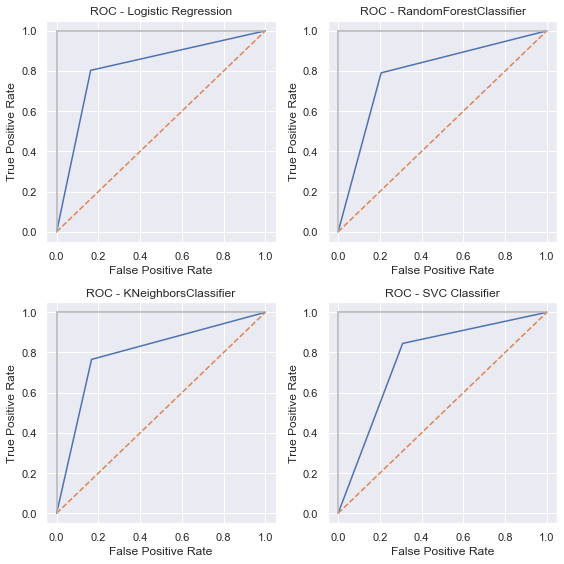

In [480]:
#plt.subplots(221, figsize=(8,6))
fig = plt.figure()
plt.subplot(2, 2, 1)
plt.title('ROC - Logistic Regression')
plt.plot(false_positive_rate1, true_positive_rate1)
plt.plot([0, 1], ls="--")
plt.plot([0, 0], [1, 0] , c=".7"), plt.plot([1, 1] , c=".7")
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')


plt.subplot(2, 2, 2)
plt.title('ROC - RandomForestClassifier')
plt.plot(false_positive_rate2, true_positive_rate2)
plt.plot([0, 1], ls="--")
plt.plot([0, 0], [1, 0] , c=".7"), plt.plot([1, 1] , c=".7")
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')


plt.subplot(2, 2, 3)
plt.title('ROC - KNeighborsClassifier')
plt.plot(false_positive_rate3, true_positive_rate3)
plt.plot([0, 1], ls="--")
plt.plot([0, 0], [1, 0] , c=".7"), plt.plot([1, 1] , c=".7")
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')


plt.subplot(2, 2, 4)
plt.title('ROC - SVC Classifier')
plt.plot(false_positive_rate4, true_positive_rate4)
plt.plot([0, 1], ls="--")
plt.plot([0, 0], [1, 0] , c=".7"), plt.plot([1, 1] , c=".7")
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')

fig.tight_layout()
plt.show()

## Interpretation :
### According to the ROC Curves, we can see that they are all quite good. But now if we look to the ROC AUC score calculated just above, the score for LogisticRegression is 0.8201 and this is the best compared to other scores.
### To conclude, to make predictions for EcstasyGroup, we choose LogisticRegression model.
#### To summarize, here is hyperparameters we choose for our LogisticRegression model :
* 'classifier__C' : 10
* 'classifier__class_weight' : 'balanced'
* 'classifier__penalty' : 'l1'
* 'classifier__solver' : 'liblinear'


# <span style='color:Red'> 3 - BenzoGroup  </span>

### a) Logistic Regression

In [481]:
# Cross-validation, using GridSearchCV

# We use a pipeline in order to scale datas each time.
pipe = Pipeline(steps = [('scale', StandardScaler()), ('classifier' , LogisticRegression())])

param_grid = [
    
    {
     'classifier__penalty' : ['l1', 'l2'],
     'classifier__C' : [0.001, 0.01, 0.1, 1, 10, 100, 1000],
     'classifier__solver' : ['liblinear'],
     'classifier__class_weight': ['balanced']
    },
    
]

scv = StratifiedKFold(n_splits=5)

logic_benzoGroup_Grid = GridSearchCV(pipe, param_grid = param_grid, scoring = 'f1', cv = scv, verbose=True, n_jobs=-1)

best_logic_benzoGroup_Grid = logic_benzoGroup_Grid.fit(X3_train, y3_train)

best_logic_benzoGroup_Grid

print("Best score : \n", best_logic_benzoGroup_Grid.best_score_)

print("Best parameters :\n", best_logic_benzoGroup_Grid.best_params_)

Fitting 5 folds for each of 14 candidates, totalling 70 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.


Best score : 
 0.5414368371958639
Best parameters :
 {'classifier__C': 0.001, 'classifier__class_weight': 'balanced', 'classifier__penalty': 'l2', 'classifier__solver': 'liblinear'}


[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    3.5s
[Parallel(n_jobs=-1)]: Done  70 out of  70 | elapsed:    3.6s finished


## The best parameters are :
* 'classifier__C'            : 0.001
* 'classifier__class_weight' : 'balanced'
* 'classifier__penalty'      : 'l2'
* 'classifier__solver'       : 'liblinear'

## We use those parameters to predict our datas :

In [587]:
pickle.dump(best_logic_benzoGroup_Grid, open('model2.sav', 'wb'))

In [483]:
sns.set(rc = {'figure.figsize':(6,5)})

TRAIN Confusion Matrix :


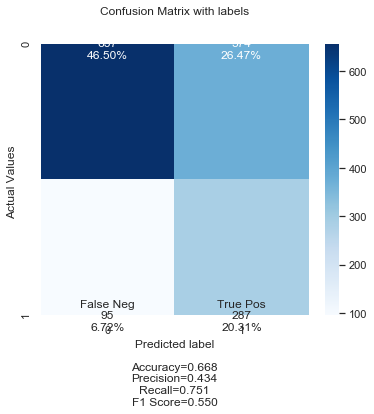

TEST Confusion Matrix :


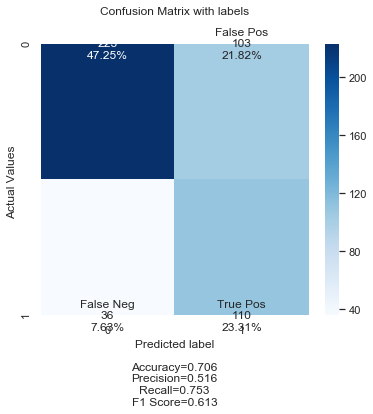

In [484]:
lrCV_benzoGroup = evaluate_model(best_logic_benzoGroup_Grid.best_estimator_, X3_train, y3_train, X3_test, y3_test, scale=False)

print("TRAIN Confusion Matrix :")
print_matrix(lrCV_benzoGroup[0])
print("TEST Confusion Matrix :")
print_matrix(lrCV_benzoGroup[1])

## Finally for Logistic Regression we have :
- For train datas : the accuracy is 0.668 and F1 score is 0.550.
- For test datas : the accuracy is 0.706 and F1 score is 0.613.

### This is a good score but we will see if we can improve those scores with others ML models.

## b) RandomForestClassifier

In [485]:
rfc = RandomForestClassifier(class_weight='balanced')

# Create param grid.

param_grid = {
    'max_depth' : list(range(1,15)), 
    'n_estimators' : list(range(1,80)),
    'class_weight': ['balanced'],
    'max_features': ['auto', 'sqrt', 'log2'],
    'criterion':['gini', 'entropy']
    }

scv = StratifiedKFold(n_splits=5)

random_benzoGroup_Grid = GridSearchCV(rfc, param_grid = param_grid, scoring = 'f1', cv = scv, verbose=True, n_jobs=-1)

# Fit on data

best_random_benzoGroup_Grid = random_benzoGroup_Grid.fit(X3_train, y3_train)

best_random_benzoGroup_Grid

Fitting 5 folds for each of 6636 candidates, totalling 33180 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done 112 tasks      | elapsed:    0.9s
[Parallel(n_jobs=-1)]: Done 1528 tasks      | elapsed:   14.0s
[Parallel(n_jobs=-1)]: Done 2980 tasks      | elapsed:   30.6s
[Parallel(n_jobs=-1)]: Done 4380 tasks      | elapsed:   50.6s
[Parallel(n_jobs=-1)]: Done 6180 tasks      | elapsed:  1.3min
[Parallel(n_jobs=-1)]: Done 8380 tasks      | elapsed:  1.9min
[Parallel(n_jobs=-1)]: Done 10980 tasks      | elapsed:  2.7min
[Parallel(n_jobs=-1)]: Done 12528 tasks      | elapsed:  3.1min
[Parallel(n_jobs=-1)]: Done 14228 tasks      | elapsed:  3.7min
[Parallel(n_jobs=-1)]: Done 16128 tasks      | elapsed:  4.4min
[Parallel(n_jobs=-1)]: Done 19394 tasks      | elapsed:  5.1min
[Parallel(n_jobs=-1)]: Done 23994 tasks      | elapsed:  6.3min
[Parallel(n_jobs=-1)]: Done 27344 tasks      | elapsed:  7.4min
[Parallel(n_jobs=-1)]: Done 30044 tasks      | elapsed:  8.5min
[Parallel(n_jobs=-1)]: Done 32944 t

GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=None, shuffle=False),
             error_score='raise-deprecating',
             estimator=RandomForestClassifier(bootstrap=True,
                                              class_weight='balanced',
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weigh...
             iid='warn', n_jobs=-1,
             param_grid={'class_weight': ['balanced'],
                         'criterion': ['gini', 'entropy'],
                         'max_depth': [1, 

In [486]:
print("Best parameters :\n", best_random_benzoGroup_Grid.best_params_)

Best parameters :
 {'class_weight': 'balanced', 'criterion': 'entropy', 'max_depth': 6, 'max_features': 'sqrt', 'n_estimators': 75}


## The best parameters are :
* 'class_weight': 'balanced'
* 'criterion': 'entropy'
* 'max_depth': 6
* 'max_features': 'sqrt'
* 'n_estimators': 75


## We use those parameters to predict our datas :

TRAIN Confusion Matrix :


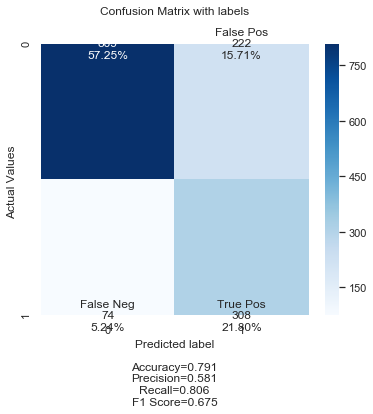

TEST Confusion Matrix :


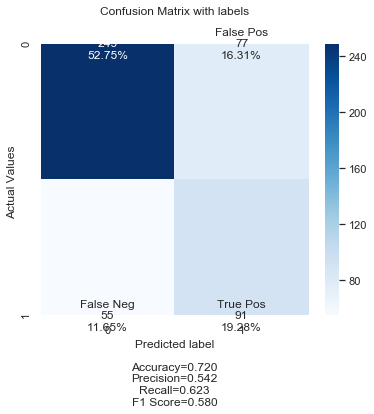

In [487]:
randomCV_benzoGroup = evaluate_model(best_random_benzoGroup_Grid.best_estimator_, X3_train, y3_train, X3_test, y3_test, scale=False)

print("TRAIN Confusion Matrix :")
print_matrix(randomCV_benzoGroup[0])
print("TEST Confusion Matrix :")
print_matrix(randomCV_benzoGroup[1])

## Finally for RandomForestClassifier we have :
- For train datas : the accuracy is 0.791 and F1 score is 0.675.
- For test datas : the accuracy is 0.720 and F1 score is 0.580.
### We can see here that we improve the accuracy on test datas but the F1 score is lower compared to LogisticRegression model

## c) KNeighbors Classifier

In [488]:
param_grid = {
    'n_neighbors': list(range(1,30)),
    'weights': ['uniform','distance'],
    'metric':['euclidean','manhattan']
}

scv = StratifiedKFold(n_splits=5)

knn_benzoGroup_Grid = GridSearchCV(KNeighborsClassifier(), param_grid = param_grid, cv=scv, verbose=1, n_jobs=-1)

best_knn_benzoGroup_Grid = knn_benzoGroup_Grid.fit(X3_train, y3_train)

best_knn_benzoGroup_Grid

Fitting 5 folds for each of 116 candidates, totalling 580 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    5.3s
[Parallel(n_jobs=-1)]: Done 580 out of 580 | elapsed:    7.8s finished


GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=None, shuffle=False),
             error_score='raise-deprecating',
             estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30,
                                            metric='minkowski',
                                            metric_params=None, n_jobs=None,
                                            n_neighbors=5, p=2,
                                            weights='uniform'),
             iid='warn', n_jobs=-1,
             param_grid={'metric': ['euclidean', 'manhattan'],
                         'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,
                                         13, 14, 15, 16, 17, 18, 19, 20, 21, 22,
                                         23, 24, 25, 26, 27, 28, 29],
                         'weights': ['uniform', 'distance']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=1)

In [489]:
print("Best parameters :\n", best_knn_benzoGroup_Grid.best_params_)

Best parameters :
 {'metric': 'manhattan', 'n_neighbors': 28, 'weights': 'uniform'}


TRAIN Confusion Matrix :


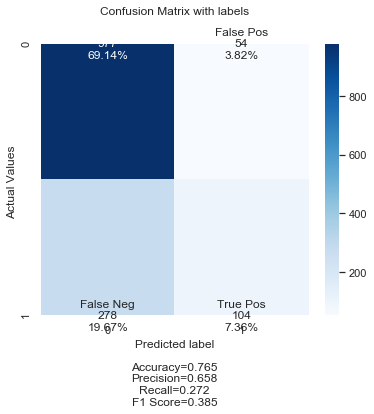

TEST Confusion Matrix :


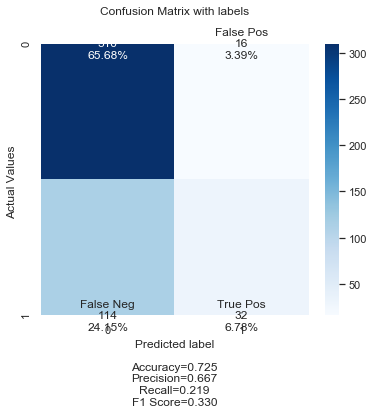

In [490]:
knnCV_benzoGroup = evaluate_model(best_knn_benzoGroup_Grid.best_estimator_, X3_train, y3_train, X3_test, y3_test, scale=False)

print("TRAIN Confusion Matrix :")
print_matrix(knnCV_benzoGroup[0])
print("TEST Confusion Matrix :")
print_matrix(knnCV_benzoGroup[1])

### Here we can see that the accuracy is a little bit better but the F1 score is pretty much lower than other models. Unfortunately this is not a good model.

## d) SVC

In [491]:
param_grid = {'C': [0.1, 1, 10, 100, 1000],
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
              'kernel': ['rbf']}

scv = StratifiedKFold(n_splits=5)

svc_benzoGroup_Grid = GridSearchCV(SVC(), param_grid, cv=scv, refit = True, verbose = 3)
 
# fitting the model for grid search

best_svc_benzoGroup_Grid=svc_benzoGroup_Grid.fit(X3_train, y3_train)

Fitting 5 folds for each of 25 candidates, totalling 125 fits
[CV] C=0.1, gamma=1, kernel=rbf ......................................
[CV] .......... C=0.1, gamma=1, kernel=rbf, score=0.729, total=   0.1s
[CV] C=0.1, gamma=1, kernel=rbf ......................................
[CV] .......... C=0.1, gamma=1, kernel=rbf, score=0.728, total=   0.1s
[CV] C=0.1, gamma=1, kernel=rbf ......................................
[CV] .......... C=0.1, gamma=1, kernel=rbf, score=0.730, total=   0.1s
[CV] C=0.1, gamma=1, kernel=rbf ......................................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s


[CV] .......... C=0.1, gamma=1, kernel=rbf, score=0.730, total=   0.1s
[CV] C=0.1, gamma=1, kernel=rbf ......................................
[CV] .......... C=0.1, gamma=1, kernel=rbf, score=0.730, total=   0.1s
[CV] C=0.1, gamma=0.1, kernel=rbf ....................................
[CV] ........ C=0.1, gamma=0.1, kernel=rbf, score=0.729, total=   0.0s
[CV] C=0.1, gamma=0.1, kernel=rbf ....................................
[CV] ........ C=0.1, gamma=0.1, kernel=rbf, score=0.728, total=   0.0s
[CV] C=0.1, gamma=0.1, kernel=rbf ....................................
[CV] ........ C=0.1, gamma=0.1, kernel=rbf, score=0.730, total=   0.0s
[CV] C=0.1, gamma=0.1, kernel=rbf ....................................
[CV] ........ C=0.1, gamma=0.1, kernel=rbf, score=0.730, total=   0.0s
[CV] C=0.1, gamma=0.1, kernel=rbf ....................................
[CV] ........ C=0.1, gamma=0.1, kernel=rbf, score=0.730, total=   0.0s
[CV] C=0.1, gamma=0.01, kernel=rbf ...................................
[CV] .

[Parallel(n_jobs=1)]: Done 125 out of 125 | elapsed:    8.7s finished


In [492]:
print("Best parameters :\n", best_svc_benzoGroup_Grid.best_params_)

Best parameters :
 {'C': 1, 'gamma': 0.1, 'kernel': 'rbf'}


TRAIN Confusion Matrix :


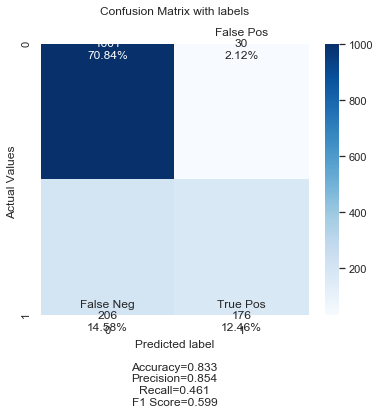

TEST Confusion Matrix :


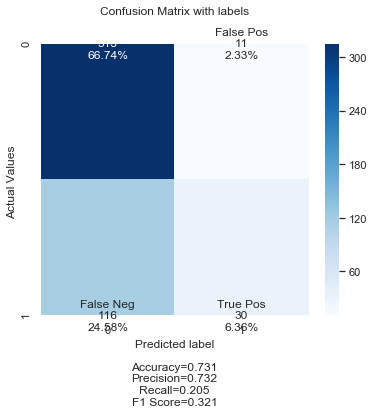

In [493]:
svCCV_benzoGroup = evaluate_model(best_svc_benzoGroup_Grid.best_estimator_, X3_train, y3_train, X3_test, y3_test, scale=True)

print("TRAIN Confusion Matrix :")
print_matrix(svCCV_benzoGroup[0])
print("TEST Confusion Matrix :")
print_matrix(svCCV_benzoGroup[1])

## Finally for SVC we have :
- For train datas : the accuracy is 0.833 and F1 score is 0.599.
- For test datas : the accuracy is 0.731 and F1 score is 0.321.

### Here we have a really good score for train datas with an accuracy of 0.833. But if we look to test datas, the F1 score looks like the KNeighbors model even if we improve the accuracy.
### Let's plot ROC Curves to find the best model.

## BenzoGroup ROC Curve 

In [494]:
y_score1=best_logic_benzoGroup_Grid.predict(X3_test)
y_score2=best_random_benzoGroup_Grid.predict(X3_test)
y_score3=best_knn_benzoGroup_Grid.predict(X3_test)
y_score4=best_svc_benzoGroup_Grid.predict(X3_test)

false_positive_rate1, true_positive_rate1, threshold1 = roc_curve(y3_test, y_score1)
false_positive_rate2, true_positive_rate2, threshold2 = roc_curve(y3_test, y_score2)
false_positive_rate3, true_positive_rate3, threshold3 = roc_curve(y3_test, y_score3)
false_positive_rate4, true_positive_rate4, threshold4 = roc_curve(y3_test, y_score4)

In [495]:
print('ROC AUC Score for Logistic Regression : ', roc_auc_score(y3_test, y_score1))
print('ROC AUC Score for RandomForestClassifier : ', roc_auc_score(y3_test, y_score2))
print('ROC AUC Score for KNeighborsClassifier : ', roc_auc_score(y3_test, y_score3))
print('ROC AUC Score for SVC Classifier : ', roc_auc_score(y3_test, y_score4))

ROC AUC Score for Logistic Regression :  0.7187368686444239
ROC AUC Score for RandomForestClassifier :  0.6935456761072359
ROC AUC Score for KNeighborsClassifier :  0.5850491637952769
ROC AUC Score for SVC Classifier :  0.604420539541138


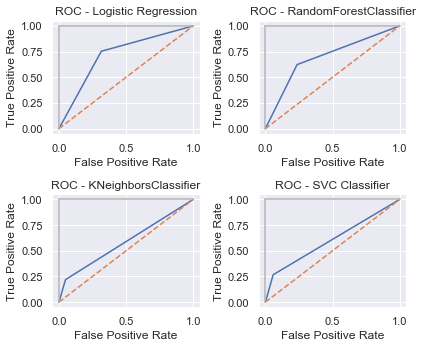

In [496]:
fig = plt.figure()
plt.subplot(2, 2, 1)
plt.title('ROC - Logistic Regression')
plt.plot(false_positive_rate1, true_positive_rate1)
plt.plot([0, 1], ls="--")
plt.plot([0, 0], [1, 0] , c=".7"), plt.plot([1, 1] , c=".7")
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')


plt.subplot(2, 2, 2)
plt.title('ROC - RandomForestClassifier')
plt.plot(false_positive_rate2, true_positive_rate2)
plt.plot([0, 1], ls="--")
plt.plot([0, 0], [1, 0] , c=".7"), plt.plot([1, 1] , c=".7")
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')


plt.subplot(2, 2, 3)
plt.title('ROC - KNeighborsClassifier')
plt.plot(false_positive_rate3, true_positive_rate3)
plt.plot([0, 1], ls="--")
plt.plot([0, 0], [1, 0] , c=".7"), plt.plot([1, 1] , c=".7")
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')


plt.subplot(2, 2, 4)
plt.title('ROC - SVC Classifier')
plt.plot(false_positive_rate4, true_positive_rate4)
plt.plot([0, 1], ls="--")
plt.plot([0, 0], [1, 0] , c=".7"), plt.plot([1, 1] , c=".7")
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')

fig.tight_layout()
plt.show()

### Interpretation :
### According to the ROC Curves : we can see that Logistic Regression curve seems like the RandomForestClassifier curve. 
### Those 2 models work better than KNeighbors and SVC models. Indeed, skilful models are represented by curves that bow up to the top left of the plot. 
### We clearly see here that Logistic Regression model and RandomForestClassifier model are better.
### But now if we look to the ROC AUC score calculated just above, the score for LogisticRegression is 0.7187 and the score for RandomForestClassifier is 0.6935.
### To conclude, to make predictions for BenzoGroup, we choose LogisticRegression model.
#### To summarize, here is hyperparameters we choose for our LogisticRegression model :
* 'classifier__C' : 0.001
* 'classifier__class_weight' : 'balanced'
* 'classifier__penalty' : 'l2'
* 'classifier__solver' : 'liblinear'

# <span style='color:Red'> CONCLUSION  </span>